this file contains all notebook of the Udemy - PyTorch for Deep Learning with Python Bootcamp
each note book is a section of content 

all main notebook are [here](https://drive.google.com/drive/folders/1J2TIcaUTdftrOcdCVsLtLz0v_mAhND8h)

# Tensor Basics


This section covers:
* Converting NumPy arrays to PyTorch tensors
* Creating tensors from scratch

## Perform standard imports

In [ ]:
import torch
import numpy as np

Confirm you're using PyTorch version 1.1.0

In [ ]:
torch.__version__

'1.1.0'

## Converting NumPy arrays to PyTorch tensors
A <a href='https://pytorch.org/docs/stable/tensors.html'><strong><tt>torch.Tensor</tt></strong></a> is a multi-dimensional matrix containing elements of a single data type.<br>
Calculations between tensors can only happen if the tensors share the same dtype.<br>
In some cases tensors are used as a replacement for NumPy to use the power of GPUs (more on this later).

In [ ]:
arr = np.array([1,2,3,4,5])
print(arr)
print(arr.dtype)
print(type(arr))

[1 2 3 4 5]
int32
<class 'numpy.ndarray'>


In [ ]:
x = torch.from_numpy(arr)
# Equivalent to x = torch.as_tensor(arr)

print(x)

tensor([1, 2, 3, 4, 5], dtype=torch.int32)


In [ ]:
# Print the type of data held by the tensor
print(x.dtype)

torch.int32


In [ ]:
# Print the tensor object type
print(type(x))
print(x.type()) # this is more specific!

<class 'torch.Tensor'>
torch.IntTensor


In [ ]:
arr2 = np.arange(0.,12.).reshape(4,3)
print(arr2)

[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]
 [ 9. 10. 11.]]


In [ ]:
x2 = torch.from_numpy(arr2)
print(x2)
print(x2.type())

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]], dtype=torch.float64)
torch.DoubleTensor


Here <tt>torch.DoubleTensor</tt> refers to 64-bit floating point data.

<h2><a href='https://pytorch.org/docs/stable/tensors.html'>Tensor Datatypes</a></h2>
<table style="display: inline-block">
<tr><th>TYPE</th><th>NAME</th><th>EQUIVALENT</th><th>TENSOR TYPE</th></tr>
<tr><td>32-bit integer (signed)</td><td>torch.int32</td><td>torch.int</td><td>IntTensor</td></tr>
<tr><td>64-bit integer (signed)</td><td>torch.int64</td><td>torch.long</td><td>LongTensor</td></tr>
<tr><td>16-bit integer (signed)</td><td>torch.int16</td><td>torch.short</td><td>ShortTensor</td></tr>
<tr><td>32-bit floating point</td><td>torch.float32</td><td>torch.float</td><td>FloatTensor</td></tr>
<tr><td>64-bit floating point</td><td>torch.float64</td><td>torch.double</td><td>DoubleTensor</td></tr>
<tr><td>16-bit floating point</td><td>torch.float16</td><td>torch.half</td><td>HalfTensor</td></tr>
<tr><td>8-bit integer (signed)</td><td>torch.int8</td><td></td><td>CharTensor</td></tr>
<tr><td>8-bit integer (unsigned)</td><td>torch.uint8</td><td></td><td>ByteTensor</td></tr></table>

## Copying vs. sharing

<a href='https://pytorch.org/docs/stable/torch.html#torch.from_numpy'><strong><tt>torch.from_numpy()</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.as_tensor'><strong><tt>torch.as_tensor()</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.tensor'><strong><tt>torch.tensor()</tt></strong></a><br>

There are a number of different functions available for <a href='https://pytorch.org/docs/stable/torch.html#creation-ops'>creating tensors</a>. When using <a href='https://pytorch.org/docs/stable/torch.html#torch.from_numpy'><strong><tt>torch.from_numpy()</tt></strong></a> and <a href='https://pytorch.org/docs/stable/torch.html#torch.as_tensor'><strong><tt>torch.as_tensor()</tt></strong></a>, the PyTorch tensor and the source NumPy array share the same memory. This means that changes to one affect the other. However, the <a href='https://pytorch.org/docs/stable/torch.html#torch.tensor'><strong><tt>torch.tensor()</tt></strong></a> function always makes a copy.

In [ ]:
# Using torch.from_numpy()
arr = np.arange(0,5)
t = torch.from_numpy(arr)
print(t)

tensor([0, 1, 2, 3, 4], dtype=torch.int32)


In [ ]:
arr[2]=77
print(t)

tensor([ 0,  1, 77,  3,  4], dtype=torch.int32)


In [ ]:
# Using torch.tensor()
arr = np.arange(0,5)
t = torch.tensor(arr)
print(t)

tensor([0, 1, 2, 3, 4], dtype=torch.int32)


In [ ]:
arr[2]=77
print(t)

tensor([0, 1, 2, 3, 4], dtype=torch.int32)


## Class constructors
<a href='https://pytorch.org/docs/stable/tensors.html'><strong><tt>torch.Tensor()</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/tensors.html'><strong><tt>torch.FloatTensor()</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/tensors.html'><strong><tt>torch.LongTensor()</tt></strong></a>, etc.<br>

There's a subtle difference between using the factory function <font color=black><tt>torch.tensor(data)</tt></font> and the class constructor <font color=black><tt>torch.Tensor(data)</tt></font>.<br>
The factory function determines the dtype from the incoming data, or from a passed-in dtype argument.<br>
The class constructor <tt>torch.Tensor()</tt>is simply an alias for <tt>torch.FloatTensor(data)</tt>. Consider the following:

In [ ]:
data = np.array([1,2,3])

In [ ]:
a = torch.Tensor(data)  # Equivalent to cc = torch.FloatTensor(data)
print(a, a.type())

tensor([1., 2., 3.]) torch.FloatTensor


In [ ]:
b = torch.tensor(data)
print(b, b.type())

tensor([1, 2, 3], dtype=torch.int32) torch.IntTensor


In [ ]:
c = torch.tensor(data, dtype=torch.long)
print(c, c.type())

tensor([1, 2, 3]) torch.LongTensor


## Creating tensors from scratch
### Uninitialized tensors with <tt>.empty()</tt>
<a href='https://pytorch.org/docs/stable/torch.html#torch.empty'><strong><tt>torch.empty()</tt></strong></a> returns an <em>uninitialized</em> tensor. Essentially a block of memory is allocated according to the size of the tensor, and any values already sitting in the block are returned. This is similar to the behavior of <tt>numpy.empty()</tt>.

In [ ]:
x = torch.empty(4, 3)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


### Initialized tensors with <tt>.zeros()</tt> and <tt>.ones()</tt>
<a href='https://pytorch.org/docs/stable/torch.html#torch.zeros'><strong><tt>torch.zeros(size)</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.ones'><strong><tt>torch.ones(size)</tt></strong></a><br>
It's a good idea to pass in the intended dtype.

In [ ]:
x = torch.zeros(4, 3, dtype=torch.int64)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


### Tensors from ranges
<a href='https://pytorch.org/docs/stable/torch.html#torch.arange'><strong><tt>torch.arange(start,end,step)</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.linspace'><strong><tt>torch.linspace(start,end,steps)</tt></strong></a><br>
Note that with <tt>.arange()</tt>, <tt>end</tt> is exclusive, while with <tt>linspace()</tt>, <tt>end</tt> is inclusive.

In [ ]:
x = torch.arange(0,18,2).reshape(3,3)
print(x)

tensor([[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16]])


In [ ]:
x = torch.linspace(0,18,12).reshape(3,4)
print(x)

tensor([[ 0.0000,  1.6364,  3.2727,  4.9091],
        [ 6.5455,  8.1818,  9.8182, 11.4545],
        [13.0909, 14.7273, 16.3636, 18.0000]])


### Tensors from data
<tt>torch.tensor()</tt> will choose the dtype based on incoming data:

In [ ]:
x = torch.tensor([1, 2, 3, 4])
print(x)
print(x.dtype)
print(x.type())

tensor([1, 2, 3, 4])
torch.int64
torch.LongTensor


Alternatively you can set the type by the tensor method used.
For a list of tensor types visit https://pytorch.org/docs/stable/tensors.html

In [ ]:
x = torch.FloatTensor([5,6,7])
print(x)
print(x.dtype)
print(x.type())

tensor([5., 6., 7.])
torch.float32
torch.FloatTensor


You can also pass the dtype in as an argument. For a list of dtypes visit https://pytorch.org/docs/stable/tensor_attributes.html#torch.torch.dtype<br>

In [ ]:
x = torch.tensor([8,9,-3], dtype=torch.int)
print(x)
print(x.dtype)
print(x.type())

tensor([ 8,  9, -3], dtype=torch.int32)
torch.int32
torch.IntTensor


### Changing the dtype of existing tensors
Don't be tempted to use <tt>x = torch.tensor(x, dtype=torch.type)</tt> as it will raise an error about improper use of tensor cloning.<br>
Instead, use the tensor <tt>.type()</tt> method.

In [ ]:
print('Old:', x.type())

x = x.type(torch.int64)

print('New:', x.type())

Old: torch.IntTensor
New: torch.LongTensor


### Random number tensors
<a href='https://pytorch.org/docs/stable/torch.html#torch.rand'><strong><tt>torch.rand(size)</tt></strong></a> returns random samples from a uniform distribution over [0, 1)<br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.randn'><strong><tt>torch.randn(size)</tt></strong></a> returns samples from the "standard normal" distribution [σ = 1]<br>
&nbsp;&nbsp;&nbsp;&nbsp;Unlike <tt>rand</tt> which is uniform, values closer to zero are more likely to appear.<br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.randint'><strong><tt>torch.randint(low,high,size)</tt></strong></a> returns random integers from low (inclusive) to high (exclusive)

In [ ]:
x = torch.rand(4, 3)
print(x)

tensor([[0.0211, 0.2336, 0.6775],
        [0.4790, 0.5132, 0.9878],
        [0.7552, 0.0789, 0.1860],
        [0.6712, 0.1564, 0.3753]])


In [ ]:
x = torch.randn(4, 3)
print(x)

tensor([[ 0.7164, -0.1538, -0.9980],
        [-1.8252,  1.1863, -0.1523],
        [ 1.4093, -0.0212, -1.5598],
        [ 0.1831, -0.6961,  1.3497]])


In [ ]:
x = torch.randint(0, 5, (4, 3))
print(x)

tensor([[0, 3, 0],
        [1, 3, 4],
        [1, 2, 3],
        [4, 4, 3]])


### Random number tensors that follow the input size
<a href='https://pytorch.org/docs/stable/torch.html#torch.rand_like'><strong><tt>torch.rand_like(input)</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.randn_like'><strong><tt>torch.randn_like(input)</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.randint_like'><strong><tt>torch.randint_like(input,low,high)</tt></strong></a><br> these return random number tensors with the same size as <tt>input</tt>

In [ ]:
x = torch.zeros(2,5)
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [ ]:
x2 = torch.randn_like(x)
print(x2)

tensor([[-0.5442, -0.3149,  0.0922,  1.1829, -0.7873],
        [ 0.3143,  0.9465,  0.4534,  0.4623,  2.2044]])


The same syntax can be used with<br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.zeros_like'><strong><tt>torch.zeros_like(input)</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.ones_like'><strong><tt>torch.ones_like(input)</tt></strong></a>

In [ ]:
x3 = torch.ones_like(x2)
print(x3)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


### Setting the random seed
<a href='https://pytorch.org/docs/stable/torch.html#torch.manual_seed'><strong><tt>torch.manual_seed(int)</tt></strong></a> is used to obtain reproducible results

In [ ]:
torch.manual_seed(42)
x = torch.rand(2, 3)
print(x)

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])


In [ ]:
torch.manual_seed(42)
x = torch.rand(2, 3)
print(x)

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])


## Tensor attributes
Besides <tt>dtype</tt>, we can look at other <a href='https://pytorch.org/docs/stable/tensor_attributes.html'>tensor attributes</a> like <tt>shape</tt>, <tt>device</tt> and <tt>layout</tt>

In [ ]:
x.shape

torch.Size([2, 3])

In [ ]:
x.size()  # equivalent to x.shape

torch.Size([2, 3])

In [ ]:
x.device

device(type='cpu')

PyTorch supports use of multiple <a href='https://pytorch.org/docs/stable/tensor_attributes.html#torch-device'>devices</a>, harnessing the power of one or more GPUs in addition to the CPU. We won't explore that here, but you should know that operations between tensors can only happen for tensors installed on the same device.

In [ ]:
x.layout

torch.strided

PyTorch has a class to hold the <a href='https://pytorch.org/docs/stable/tensor_attributes.html#torch.torch.layout'>memory layout</a> option. The default setting of <a href='https://en.wikipedia.org/wiki/Stride_of_an_array'>strided</a> will suit our purposes throughout the course.

# Tensor Operations


This section covers:
* Indexing and slicing
* Reshaping tensors (tensor views)
* Tensor arithmetic and basic operations
* Dot products
* Matrix multiplication
* Additional, more advanced operations

## Perform standard imports

In [ ]:
import torch
import numpy as np

## Indexing and slicing
Extracting specific values from a tensor works just the same as with NumPy arrays<br>
<img src='../Images/arrayslicing.png' width="500" style="display: inline-block"><br><br>
Image source: http://www.scipy-lectures.org/_images/numpy_indexing.png

In [ ]:
x = torch.arange(6).reshape(3,2)
print(x)

tensor([[0, 1],
        [2, 3],
        [4, 5]])


In [ ]:
# Grabbing the right hand column values
x[:,1]

tensor([1, 3, 5])

In [ ]:
# Grabbing the right hand column as a (3,1) slice
x[:,1:]

tensor([[1],
        [3],
        [5]])

## Reshape tensors with <tt>.view()</tt>
<a href='https://pytorch.org/docs/master/tensors.html#torch.Tensor.view'><strong><tt>view()</tt></strong></a> and <a href='https://pytorch.org/docs/master/torch.html#torch.reshape'><strong><tt>reshape()</tt></strong></a> do essentially the same thing by returning a reshaped tensor without changing the original tensor in place.<br>
There's a good discussion of the differences <a href='https://stackoverflow.com/questions/49643225/whats-the-difference-between-reshape-and-view-in-pytorch'>here</a>.

In [ ]:
x = torch.arange(10)
print(x)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [ ]:
x.view(2,5)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
x.view(5,2)

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [ ]:
# x is unchanged
x

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Views reflect the most current data

In [ ]:
z = x.view(2,5)
x[0]=234
print(z)

tensor([[234,   1,   2,   3,   4],
        [  5,   6,   7,   8,   9]])


### Views can infer the correct size
By passing in <tt>-1</tt> PyTorch will infer the correct value from the given tensor

In [ ]:
x.view(2,-1)

tensor([[234,   1,   2,   3,   4],
        [  5,   6,   7,   8,   9]])

In [ ]:
x.view(-1,5)

tensor([[234,   1,   2,   3,   4],
        [  5,   6,   7,   8,   9]])

### Adopt another tensor's shape with <tt>.view_as()</tt>
<a href='https://pytorch.org/docs/master/tensors.html#torch.Tensor.view_as'><strong><tt>view_as(input)</tt></strong></a> only works with tensors that have the same number of elements.

In [ ]:
x.view_as(z)

tensor([[234,   1,   2,   3,   4],
        [  5,   6,   7,   8,   9]])

## Tensor Arithmetic
Adding tensors can be performed a few different ways depending on the desired result.<br>

As a simple expression:

In [ ]:
a = torch.tensor([1,2,3], dtype=torch.float)
b = torch.tensor([4,5,6], dtype=torch.float)
print(a + b)

tensor([5., 7., 9.])


As arguments passed into a torch operation:

In [ ]:
print(torch.add(a, b))

tensor([5., 7., 9.])


With an output tensor passed in as an argument:

In [ ]:
result = torch.empty(3)
torch.add(a, b, out=result)  # equivalent to result=torch.add(a,b)
print(result)

tensor([5., 7., 9.])


Changing a tensor in-place

In [ ]:
a.add_(b)  # equivalent to a=torch.add(a,b)
print(a)

tensor([5., 7., 9.])


<div class="alert alert-info"><strong>NOTE:</strong> Any operation that changes a tensor in-place is post-fixed with an underscore _.
    <br>In the above example: <tt>a.add_(b)</tt> changed <tt>a</tt>.</div>

### Basic Tensor Operations
<table style="display: inline-block">
<caption style="text-align: center"><strong>Arithmetic</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>a + b</td><td>a.add(b)</td><td>element wise addition</td></tr>
<tr><td>a - b</td><td>a.sub(b)</td><td>subtraction</td></tr>
<tr><td>a * b</td><td>a.mul(b)</td><td>multiplication</td></tr>
<tr><td>a / b</td><td>a.div(b)</td><td>division</td></tr>
<tr><td>a % b</td><td>a.fmod(b)</td><td>modulo (remainder after division)</td></tr>
<tr><td>a<sup>b</sup></td><td>a.pow(b)</td><td>power</td></tr>
<tr><td>&nbsp;</td><td></td><td></td></tr>
</table>

<table style="display: inline-block">
<caption style="text-align: center"><strong>Monomial Operations</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>|a|</td><td>torch.abs(a)</td><td>absolute value</td></tr>
<tr><td>1/a</td><td>torch.reciprocal(a)</td><td>reciprocal</td></tr>
<tr><td>$\sqrt{a}$</td><td>torch.sqrt(a)</td><td>square root</td></tr>
<tr><td>log(a)</td><td>torch.log(a)</td><td>natural log</td></tr>
<tr><td>e<sup>a</sup></td><td>torch.exp(a)</td><td>exponential</td></tr>
<tr><td>12.34  ==>  12.</td><td>torch.trunc(a)</td><td>truncated integer</td></tr>
<tr><td>12.34  ==>  0.34</td><td>torch.frac(a)</td><td>fractional component</td></tr>
</table>

<table style="display: inline-block">
<caption style="text-align: center"><strong>Trigonometry</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>sin(a)</td><td>torch.sin(a)</td><td>sine</td></tr>
<tr><td>cos(a)</td><td>torch.sin(a)</td><td>cosine</td></tr>
<tr><td>tan(a)</td><td>torch.sin(a)</td><td>tangent</td></tr>
<tr><td>arcsin(a)</td><td>torch.asin(a)</td><td>arc sine</td></tr>
<tr><td>arccos(a)</td><td>torch.acos(a)</td><td>arc cosine</td></tr>
<tr><td>arctan(a)</td><td>torch.atan(a)</td><td>arc tangent</td></tr>
<tr><td>sinh(a)</td><td>torch.sinh(a)</td><td>hyperbolic sine</td></tr>
<tr><td>cosh(a)</td><td>torch.cosh(a)</td><td>hyperbolic cosine</td></tr>
<tr><td>tanh(a)</td><td>torch.tanh(a)</td><td>hyperbolic tangent</td></tr>
</table>

<table style="display: inline-block">
<caption style="text-align: center"><strong>Summary Statistics</strong></caption>
<tr><th>OPERATION</th><th>FUNCTION</th><th>DESCRIPTION</th></tr>
<tr><td>$\sum a$</td><td>torch.sum(a)</td><td>sum</td></tr>
<tr><td>$\bar a$</td><td>torch.mean(a)</td><td>mean</td></tr>
<tr><td>a<sub>max</sub></td><td>torch.max(a)</td><td>maximum</td></tr>
<tr><td>a<sub>min</sub></td><td>torch.min(a)</td><td>minimum</td></tr>
<tr><td colspan="3">torch.max(a,b) returns a tensor of size a<br>containing the element wise max between a and b</td></tr>
</table>

<div class="alert alert-info"><strong>NOTE:</strong> Most arithmetic operations require float values. Those that do work with integers return integer tensors.<br>
For example, <tt>torch.div(a,b)</tt> performs floor division (truncates the decimal) for integer types, and classic division for floats.</div>

#### Use the space below to experiment with different operations

In [ ]:
a = torch.tensor([1,2,3], dtype=torch.float)
b = torch.tensor([4,5,6], dtype=torch.float)
print(torch.add(a,b).sum())

tensor(21.)


## Dot products
A <a href='https://en.wikipedia.org/wiki/Dot_product'>dot product</a> is the sum of the products of the corresponding entries of two 1D tensors. If the tensors are both vectors, the dot product is given as:<br>

$\begin{bmatrix} a & b & c \end{bmatrix} \;\cdot\; \begin{bmatrix} d & e & f \end{bmatrix} = ad + be + cf$

If the tensors include a column vector, then the dot product is the sum of the result of the multiplied matrices. For example:<br>
$\begin{bmatrix} a & b & c \end{bmatrix} \;\cdot\; \begin{bmatrix} d \\ e \\ f \end{bmatrix} = ad + be + cf$<br><br>
Dot products can be expressed as <a href='https://pytorch.org/docs/stable/torch.html#torch.dot'><strong><tt>torch.dot(a,b)</tt></strong></a> or `a.dot(b)` or `b.dot(a)`

In [ ]:
a = torch.tensor([1,2,3], dtype=torch.float)
b = torch.tensor([4,5,6], dtype=torch.float)
print(a.mul(b)) # for reference
print()
print(a.dot(b))

tensor([ 4., 10., 18.])

tensor(32.)


<div class="alert alert-info"><strong>NOTE:</strong> There's a slight difference between <tt>torch.dot()</tt> and <tt>numpy.dot()</tt>. While <tt>torch.dot()</tt> only accepts 1D arguments and returns a dot product, <tt>numpy.dot()</tt> also accepts 2D arguments and performs matrix multiplication. We show matrix multiplication below.</div>

## Matrix multiplication
2D <a href='https://en.wikipedia.org/wiki/Matrix_multiplication'>Matrix multiplication</a> is possible when the number of columns in tensor <strong><tt>A</tt></strong> matches the number of rows in tensor <strong><tt>B</tt></strong>. In this case, the product of tensor <strong><tt>A</tt></strong> with size $(x,y)$ and tensor <strong><tt>B</tt></strong> with size $(y,z)$ results in a tensor of size $(x,z)$
<div>
<div align="left"><img src='../Images/Matrix_multiplication_diagram.png' align="left"><br><br>

$\begin{bmatrix} a & b & c \\
d & e & f \end{bmatrix} \;\times\; \begin{bmatrix} m & n \\ p & q \\ r & s \end{bmatrix} = \begin{bmatrix} (am+bp+cr) & (an+bq+cs) \\
(dm+ep+fr) & (dn+eq+fs) \end{bmatrix}$</div></div>

<div style="clear:both">Image source: <a href='https://commons.wikimedia.org/wiki/File:Matrix_multiplication_diagram_2.svg'>https://commons.wikimedia.org/wiki/File:Matrix_multiplication_diagram_2.svg</a></div>

Matrix multiplication can be computed using <a href='https://pytorch.org/docs/stable/torch.html#torch.mm'><strong><tt>torch.mm(a,b)</tt></strong></a> or `a.mm(b)` or `a @ b`

In [ ]:
a = torch.tensor([[0,2,4],[1,3,5]], dtype=torch.float)
b = torch.tensor([[6,7],[8,9],[10,11]], dtype=torch.float)

print('a: ',a.size())
print('b: ',b.size())
print('a x b: ',torch.mm(a,b).size())

a:  torch.Size([2, 3])
b:  torch.Size([3, 2])
a x b:  torch.Size([2, 2])


In [ ]:
print(torch.mm(a,b))

tensor([[56., 62.],
        [80., 89.]])


In [ ]:
print(a.mm(b))

tensor([[56., 62.],
        [80., 89.]])


In [ ]:
print(a @ b)

tensor([[56., 62.],
        [80., 89.]])


### Matrix multiplication with broadcasting
Matrix multiplication that involves <a href='https://pytorch.org/docs/stable/notes/broadcasting.html#broadcasting-semantics'>broadcasting</a> can be computed using <a href='https://pytorch.org/docs/stable/torch.html#torch.matmul'><strong><tt>torch.matmul(a,b)</tt></strong></a> or `a.matmul(b)` or `a @ b`

In [ ]:
t1 = torch.randn(2, 3, 4)
t2 = torch.randn(4, 5)

print(torch.matmul(t1, t2).size())

torch.Size([2, 3, 5])


However, the same operation raises a <tt><strong>RuntimeError</strong></tt> with <tt>torch.mm()</tt>:

In [ ]:
print(torch.mm(t1, t2).size())

RuntimeError: matrices expected, got 3D, 2D tensors at ..\aten\src\TH/generic/THTensorMath.cpp:956

___
# Advanced operations

## L2 or Euclidian Norm
See <a href='https://pytorch.org/docs/stable/torch.html#torch.norm'><strong><tt>torch.norm()</tt></strong></a>

The <a href='https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm'>Euclidian Norm</a> gives the vector norm of $x$ where $x=(x_1,x_2,...,x_n)$.<br>
It is calculated as<br>

${\displaystyle \left\|{\boldsymbol {x}}\right\|_{2}:={\sqrt {x_{1}^{2}+\cdots +x_{n}^{2}}}}$


When applied to a matrix, <tt>torch.norm()</tt> returns the <a href='https://en.wikipedia.org/wiki/Matrix_norm#Frobenius_norm'>Frobenius norm</a> by default.

In [ ]:
x = torch.tensor([2.,5.,8.,14.])
x.norm()

tensor(17.)

## Number of elements
See <a href='https://pytorch.org/docs/stable/torch.html#torch.numel'><strong><tt>torch.numel()</tt></strong></a>

Returns the number of elements in a tensor.

In [ ]:
x = torch.ones(3,7)
x.numel()

21

This can be useful in certain calculations like Mean Squared Error:<br>
<tt>
def mse(t1, t2):<br>
&nbsp;&nbsp;&nbsp;&nbsp;diff = t1 - t2<br>
    &nbsp;&nbsp;&nbsp;&nbsp;return torch.sum(diff * diff) / diff<strong>.numel()</strong></tt>

# PyTorch Gradients


This section covers the PyTorch <a href='https://pytorch.org/docs/stable/autograd.html'><strong><tt>autograd</tt></strong></a> implementation of gradient descent. Tools include:
* <a href='https://pytorch.org/docs/stable/autograd.html#torch.autograd.backward'><tt><strong>torch.autograd.backward()</strong></tt></a>
* <a href='https://pytorch.org/docs/stable/autograd.html#torch.autograd.grad'><tt><strong>torch.autograd.grad()</strong></tt></a>

Before continuing in this section, be sure to watch the theory lectures to understand the following concepts:
* Error functions (step and sigmoid)
* One-hot encoding
* Maximum likelihood
* Cross entropy (including multi-class cross entropy)
* Back propagation (backprop)

<div class="alert alert-info"><h3>Additional Resources:</h3>
<strong>
<a href='https://pytorch.org/docs/stable/notes/autograd.html'>PyTorch Notes:</a></strong>&nbsp;&nbsp;<font color=black>Autograd mechanics</font></div>

## Autograd - Automatic Differentiation
In previous sections we created tensors and performed a variety of operations on them, but we did nothing to store the sequence of operations, or to apply the derivative of a completed function.

In this section we'll introduce the concept of the <em>dynamic computational graph</em> which is comprised of all the <em>Tensor</em> objects in the network, as well as the <em>Functions</em> used to create them. Note that only the input Tensors we create ourselves will not have associated Function objects.

The PyTorch <a href='https://pytorch.org/docs/stable/autograd.html'><strong><tt>autograd</tt></strong></a> package provides automatic differentiation for all operations on Tensors. This is because operations become attributes of the tensors themselves. When a Tensor's <tt>.requires_grad</tt> attribute is set to True, it starts to track all operations on it. When an operation finishes you can call <tt>.backward()</tt> and have all the gradients computed automatically. The gradient for a tensor will be accumulated into its <tt>.grad</tt> attribute.
    
Let's see this in practice.

## Back-propagation on one step
We'll start by applying a single polynomial function $y = f(x)$ to tensor $x$. Then we'll backprop and print the gradient $\frac {dy} {dx}$.

$\begin{split}Function:\quad y &= 2x^4 + x^3 + 3x^2 + 5x + 1 \\
Derivative:\quad y' &= 8x^3 + 3x^2 + 6x + 5\end{split}$

#### Step 1. Perform standard imports

In [ ]:
import torch

#### Step 2. Create a tensor with <tt>requires_grad</tt> set to True
This sets up computational tracking on the tensor.

In [ ]:
x = torch.tensor(2.0, requires_grad=True)

#### Step 3. Define a function

In [ ]:
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1

print(y)

tensor(63., grad_fn=<AddBackward0>)


Since $y$ was created as a result of an operation, it has an associated gradient function accessible as <tt>y.grad_fn</tt><br>
The calculation of $y$ is done as:<br>

$\quad y=2(2)^4+(2)^3+3(2)^2+5(2)+1 = 32+8+12+10+1 = 63$

This is the value of $y$ when $x=2$.

#### Step 4. Backprop

In [ ]:
y.backward()

#### Step 5. Display the resulting gradient

In [ ]:
print(x.grad)

tensor(93.)


Note that <tt>x.grad</tt> is an attribute of tensor $x$, so we don't use parentheses. The computation is the result of<br>

$\quad y'=8(2)^3+3(2)^2+6(2)+5 = 64+12+12+5 = 93$

This is the slope of the polynomial at the point $(2,63)$.

## Back-propagation on multiple steps
Now let's do something more complex, involving layers $y$ and $z$ between $x$ and our output layer $out$.
#### 1. Create a tensor

In [ ]:
x = torch.tensor([[1.,2,3],[3,2,1]], requires_grad=True)
print(x)

tensor([[1., 2., 3.],
        [3., 2., 1.]], requires_grad=True)


#### 2. Create the first layer with $y = 3x+2$

In [ ]:
y = 3*x + 2
print(y)

tensor([[ 5.,  8., 11.],
        [11.,  8.,  5.]], grad_fn=<AddBackward0>)


#### 3. Create the second layer with $z = 2y^2$

In [ ]:
z = 2*y**2
print(z)

tensor([[ 50., 128., 242.],
        [242., 128.,  50.]], grad_fn=<MulBackward0>)


#### 4. Set the output to be the matrix mean

In [ ]:
out = z.mean()
print(out)

tensor(140., grad_fn=<MeanBackward1>)


#### 5. Now perform back-propagation to find the gradient of x w.r.t out
(If you haven't seen it before, w.r.t. is an abbreviation of <em>with respect to</em>)

In [ ]:
out.backward()
print(x.grad)

tensor([[10., 16., 22.],
        [22., 16., 10.]])


You should see a 2x3 matrix. If we call the final <tt>out</tt> tensor "$o$", we can calculate the partial derivative of $o$ with respect to $x_i$ as follows:<br>

$o = \frac {1} {6}\sum_{i=1}^{6} z_i$<br>

$z_i = 2(y_i)^2 = 2(3x_i+2)^2$<br>

To solve the derivative of $z_i$ we use the <a href='https://en.wikipedia.org/wiki/Chain_rule'>chain rule</a>, where the derivative of $f(g(x)) = f'(g(x))g'(x)$<br>

In this case<br>

$\begin{split} f(g(x)) &= 2(g(x))^2, \quad &f'(g(x)) = 4g(x) \\
g(x) &= 3x+2, &g'(x) = 3 \\
\frac {dz} {dx} &= 4g(x)\times 3 &= 12(3x+2) \end{split}$

Therefore,<br>

$\frac{\partial o}{\partial x_i} = \frac{1}{6}\times 12(3x+2)$<br>

$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = 2(3(1)+2) = 10$

$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=2} = 2(3(2)+2) = 16$

$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=3} = 2(3(3)+2) = 22$

## Turn off tracking
There may be times when we don't want or need to track the computational history.

You can reset a tensor's <tt>requires_grad</tt> attribute in-place using `.requires_grad_(True)` (or False) as needed.

When performing evaluations, it's often helpful to wrap a set of operations in `with torch.no_grad():`

A less-used method is to run `.detach()` on a tensor to prevent future computations from being tracked. This can be handy when cloning a tensor.

<div class="alert alert-info"><strong>A NOTE ABOUT TENSORS AND VARIABLES:</strong> Prior to PyTorch v0.4.0 (April 2018) Tensors (<tt>torch.Tensor</tt>) only held data, and tracking history was reserved for the Variable wrapper (<tt>torch.autograd.Variable</tt>). Since v0.4.0 tensors and variables have merged, and tracking functionality is now available through the <tt>requires_grad=True</tt> flag.</div>

# Linear Regression with PyTorch
In this section we'll use PyTorch's machine learning model to progressively develop a best-fit line for a given set of data points. Like most linear regression algorithms, we're seeking to minimize the error between our model and the actual data, using a <em>loss function</em> like mean-squared-error.

<img src='../Images/linear-regression-residuals.png' width='400' style="display: inline-block"><br>

Image source: <a href='https://commons.wikimedia.org/wiki/File:Residuals_for_Linear_Regression_Fit.png'>https://commons.wikimedia.org/wiki/File:Residuals_for_Linear_Regression_Fit.png</a>

To start, we'll develop a collection of data points that appear random, but that fit a known linear equation $y = 2x+1$

## Perform standard imports

In [ ]:
import torch
import torch.nn as nn  # we'll use this a lot going forward!

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Create a column matrix of X values
We can create tensors right away rather than convert from NumPy arrays.

In [ ]:
X = torch.linspace(1,50,50).reshape(-1,1)

# Equivalent to
# X = torch.unsqueeze(torch.linspace(1,50,50), dim=1)

## Create a "random" array of error values
We want 50 random integer values that collectively cancel each other out.

In [ ]:
torch.manual_seed(71) # to obtain reproducible results
e = torch.randint(-8,9,(50,1),dtype=torch.float)
print(e.sum())

tensor(0.)


## Create a column matrix of y values
Here we'll set our own parameters of $\mathrm {weight} = 2,\; \mathrm {bias} = 1$, plus the error amount.<br><strong><tt>y</tt></strong> will have the same shape as <strong><tt>X</tt></strong> and <strong><tt>e</tt></strong>

In [ ]:
y = 2*X + 1 + e
print(y.shape)

torch.Size([50, 1])


## Plot the results
We have to convert tensors to NumPy arrays just for plotting.

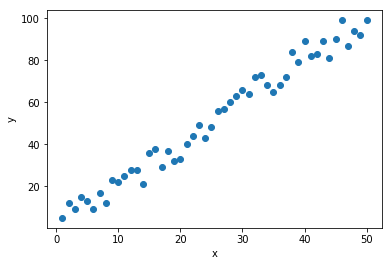

In [ ]:
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x');

Note that when we created tensor $X$, we did <em>not</em> pass <tt>requires_grad=True</tt>. This means that $y$ doesn't have a gradient function, and <tt>y.backward()</tt> won't work. Since PyTorch is not tracking operations, it doesn't know the relationship between $X$ and $y$.

## Simple linear model
As a quick demonstration we'll show how the built-in <tt>nn.Linear()</tt> model preselects weight and bias values at random.

In [ ]:
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


Without seeing any data, the model sets a random weight of 0.1060 and a bias of 0.9638.

## Model classes
PyTorch lets us define models as object classes that can store multiple model layers. In upcoming sections we'll set up several neural network layers, and determine how each layer should perform its forward pass to the next layer. For now, though, we only need a single <tt>linear</tt> layer.

In [ ]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

<div class="alert alert-info"><strong>NOTE:</strong> The "Linear" model layer used here doesn't really refer to linear regression. Instead, it describes the type of neural network layer employed. Linear layers are also called "fully connected" or "dense" layers. Going forward our models may contain linear layers, convolutional layers, and more.</div>

When <tt>Model</tt> is instantiated, we need to pass in the size (dimensions) of the incoming and outgoing features. For our purposes we'll use (1,1).<br>As above, we can see the initial hyperparameters.

In [ ]:
torch.manual_seed(59)
model = Model(1, 1)
print(model)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: 0.10597813129425049
Bias:   0.9637961387634277


As models become more complex, it may be better to iterate over all the model parameters:

In [ ]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


<div class="alert alert-info"><strong>NOTE:</strong> In the above example we had our Model class accept arguments for the number of input and output features.<br>For simplicity we can hardcode them into the Model:
         
<tt><font color=black>
class Model(torch.nn.Module):<br>
&nbsp;&nbsp;&nbsp;&nbsp;def \_\_init\_\_(self):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;super().\_\_init\_\_()<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;self.linear = Linear(1,1)<br><br>
model = Model()
</font></tt><br><br>

Alternatively we can use default arguments:

<tt><font color=black>
class Model(torch.nn.Module):<br>
&nbsp;&nbsp;&nbsp;&nbsp;def \_\_init\_\_(self, in_dim=1, out_dim=1):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;super().\_\_init\_\_()<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;self.linear = Linear(in_dim,out_dim)<br><br>
model = Model()<br>
<em>\# or</em><br>
model = Model(i,o)</font></tt>
</div>

Now let's see the result when we pass a tensor into the model.

In [ ]:
x = torch.tensor([2.0])
print(model.forward(x))   # equivalent to print(model(x))

tensor([1.1758], grad_fn=<AddBackward0>)


which is confirmed with $f(x) = (0.1060)(2.0)+(0.9638) = 1.1758$

## Plot the initial model
We can plot the untrained model against our dataset to get an idea of our starting point.

In [ ]:
x1 = np.array([X.min(),X.max()])
print(x1)

[ 1. 50.]


In [ ]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Initial weight: {w1:.8f}, Initial bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(y1)

Initial weight: 0.10597813, Initial bias: 0.96379614

[1.0697743 6.2627025]


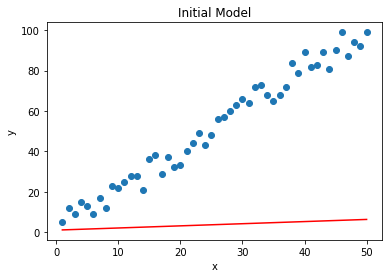

In [ ]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Initial Model')
plt.ylabel('y')
plt.xlabel('x');

## Set the loss function
We could write our own function to apply a Mean Squared Error (MSE) that follows<br>

$\begin{split}MSE &= \frac {1} {n} \sum_{i=1}^n {(y_i - \hat y_i)}^2 \\
&= \frac {1} {n} \sum_{i=1}^n {(y_i - (wx_i + b))}^2\end{split}$<br>

Fortunately PyTorch has it built in.<br>
<em>By convention, you'll see the variable name "criterion" used, but feel free to use something like "linear_loss_func" if that's clearer.</em>

In [ ]:
criterion = nn.MSELoss()

## Set the optimization
Here we'll use <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent'>Stochastic Gradient Descent</a> (SGD) with an applied <a href='https://en.wikipedia.org/wiki/Learning_rate'>learning rate</a> (lr) of 0.001. Recall that the learning rate tells the optimizer how much to adjust each parameter on the next round of calculations. Too large a step and we run the risk of overshooting the minimum, causing the algorithm to diverge. Too small and it will take a long time to converge.

For more complicated (multivariate) data, you might also consider passing optional <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Momentum'><tt>momentum</tt></a> and <a href='https://en.wikipedia.org/wiki/Tikhonov_regularization'><tt>weight_decay</tt></a> arguments. Momentum allows the algorithm to "roll over" small bumps to avoid local minima that can cause convergence too soon. Weight decay (also called an L2 penalty) applies to biases.

For more information, see <a href='https://pytorch.org/docs/stable/optim.html'><strong><tt>torch.optim</tt></strong></a>

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

# You'll sometimes see this as
# optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

## Train the model
An <em>epoch</em> is a single pass through the entire dataset. We want to pick a sufficiently large number of epochs to reach a plateau close to our known parameters of $\mathrm {weight} = 2,\; \mathrm {bias} = 1$

<div class="alert alert-info"><strong>Let's walk through the steps we're about to take:</strong><br>

1. Set a reasonably large number of passes<br>
<tt><font color=black>epochs = 50</font></tt><br>
2. Create a list to store loss values. This will let us view our progress afterward.<br>
<tt><font color=black>losses = []</font></tt><br>
<tt><font color=black>for i in range(epochs):</font></tt><br>
3. Bump "i" so that the printed report starts at 1<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;i+=1</font></tt><br>
4. Create a prediction set by running "X" through the current model parameters<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;y_pred = model.forward(X)</font></tt><br>
5. Calculate the loss<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;loss = criterion(y_pred, y)</font></tt><br>
6. Add the loss value to our tracking list<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;losses.append(loss)</font></tt><br>
7. Print the current line of results<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;print(f'epoch: {i:2} loss: {loss.item():10.8f}')</font></tt><br>
8. Gradients accumulate with every backprop. To prevent compounding we need to reset the stored gradient for each new epoch.<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;optimizer.zero_grad()</font></tt><br>
9. Now we can backprop<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;loss.backward()</font></tt><br>
10. Finally, we can update the hyperparameters of our model<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;optimizer.step()</font></tt>
</div>

In [ ]:
epochs = 50
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss)
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}  weight: {model.linear.weight.item():10.8f}  \
bias: {model.linear.bias.item():10.8f}') 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 3057.21679688  weight: 0.10597813  bias: 0.96379614
epoch:  2  loss: 1588.53100586  weight: 3.33490038  bias: 1.06046367
epoch:  3  loss: 830.30010986  weight: 1.01483274  bias: 0.99226278
epoch:  4  loss: 438.85241699  weight: 2.68179965  bias: 1.04252183
epoch:  5  loss: 236.76152039  weight: 1.48402119  bias: 1.00766504
epoch:  6  loss: 132.42912292  weight: 2.34460592  bias: 1.03396463
epoch:  7  loss: 78.56572723  weight: 1.72622538  bias: 1.01632178
epoch:  8  loss: 50.75775909  weight: 2.17050409  bias: 1.03025162
epoch:  9  loss: 36.40123367  weight: 1.85124576  bias: 1.02149546
epoch: 10  loss: 28.98922729  weight: 2.08060074  bias: 1.02903891
epoch: 11  loss: 25.16238213  weight: 1.91576838  bias: 1.02487016
epoch: 12  loss: 23.18647385  weight: 2.03416562  bias: 1.02911627
epoch: 13  loss: 22.16612816  weight: 1.94905841  bias: 1.02731562
epoch: 14  loss: 21.63911057  weight: 2.01017213  bias: 1.02985907
epoch: 15  loss: 21.36677170  weight: 1.96622372  bias

## Plot the loss values
Let's see how loss changed over time

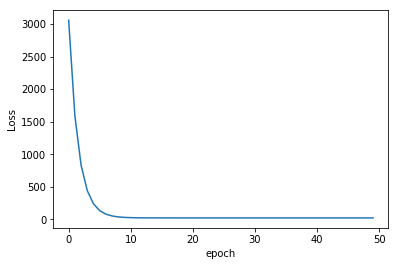

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

## Plot the result
Now we'll derive <tt>y1</tt> from the new model to plot the most recent best-fit line.

In [ ]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w1:.8f}, Current bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(x1)
print(y1)

Current weight: 1.98381913, Current bias: 1.05575156

[ 1. 50.]
[  3.0395708 100.246704 ]


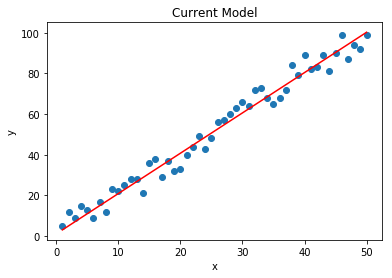

In [ ]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x');

# Datasets with PyTorch


In this section we'll show how to:
* load data from outside files
* build random batches using PyTorch's <a href='https://pytorch.org/docs/stable/data.html'><strong><tt>data</tt></strong></a> utilities<br>

At the end we'll briefly mention <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>.

### Perform standard imports

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading data from files
We've seen how to load NumPy arrays into PyTorch, and anyone familiar with <tt>pandas.read_csv()</tt> can use it to prepare data before forming tensors. Here we'll load the <a href='https://en.wikipedia.org/wiki/Iris_flower_data_set'>iris flower dataset</a> saved as a .csv file.

In [ ]:
df = pd.read_csv('../Data/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
df.shape

(150, 5)

### Plot the data

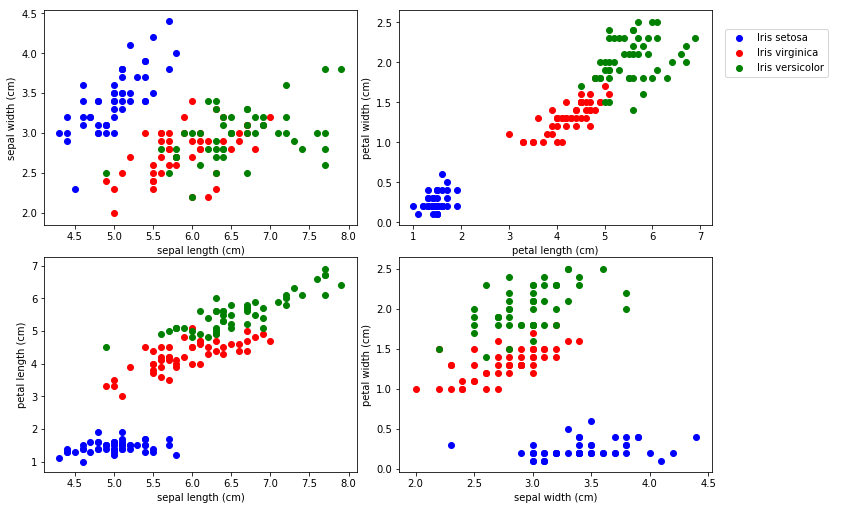

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

The iris dataset consists of 50 samples each from three species of Iris (<em>Iris setosa</em>, <em>Iris virginica</em> and <em>Iris versicolor</em>), for 150 total samples. We have four features (sepal length & width, petal length & width) and three unique labels:
0. <em>Iris setosa</em>
1. <em>Iris virginica</em>
2. <em>Iris versicolor</em>

#### The classic method for building train/test split tensors
Before introducing PyTorch's Dataset and DataLoader classes, we'll take a quick look at the alternative.

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df.drop('target',axis=1).values,
                                                    df['target'].values, test_size=0.2,
                                                    random_state=33)

X_train = torch.FloatTensor(train_X)
X_test = torch.FloatTensor(test_X)
y_train = torch.LongTensor(train_y).reshape(-1, 1)
y_test = torch.LongTensor(test_y).reshape(-1, 1)

In [ ]:
print(f'Training size: {len(y_train)}')
labels, counts = y_train.unique(return_counts=True)
print(f'Labels: {labels}\nCounts: {counts}')

Training size: 120
Labels: tensor([0, 1, 2])
Counts: tensor([42, 42, 36])


<div class="alert alert-success"><strong>NOTE: </strong>The importance of a balanced training set is discussed in <em>A systematic study of the class imbalance problem in convolutional neural networks</em> by Mateusz Buda, Atsuto Maki, Maciej A. Mazurowski (10/15/17, latest rev 10/13/18) <a href='https://arxiv.org/abs/1710.05381'>https://arxiv.org/abs/1710.05381</a><br>For example, the authors show that oversampling a less common class so that it matches the more common classes is always the preferred choice.</div>

In [ ]:
X_train.size()

torch.Size([120, 4])

In [ ]:
y_train.size()

torch.Size([120, 1])

<div class="alert alert-info"><strong>NOTE: </strong>It's up to us to remember which columns correspond to which features.</div>

### Using PyTorch's Dataset and DataLoader classes
A far better alternative is to leverage PyTorch's <a href='https://pytorch.org/docs/stable/data.html'><strong><tt>Dataset</tt></strong></a> and <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader'><strong><tt>DataLoader</strong></tt></a> classes.

Usually, to set up a Dataset specific to our investigation we would define our own custom class that inherits from <tt>torch.utils.data.Dataset</tt> (we'll do this in the CNN section). For now, we can use the built-in <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.TensorDataset'><strong><tt>TensorDataset</tt></strong></a> class.

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

data = df.drop('target',axis=1).values
labels = df['target'].values

iris = TensorDataset(torch.FloatTensor(data),torch.LongTensor(labels))

In [ ]:
len(iris)

150

In [ ]:
type(iris)

torch.utils.data.dataset.TensorDataset

In [ ]:
for i in iris:
    print(i)

(tensor([5.1000, 3.5000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.0000, 1.4000, 0.2000]), tensor(0))
(tensor([4.7000, 3.2000, 1.3000, 0.2000]), tensor(0))
(tensor([4.6000, 3.1000, 1.5000, 0.2000]), tensor(0))
(tensor([5.0000, 3.6000, 1.4000, 0.2000]), tensor(0))
(tensor([5.4000, 3.9000, 1.7000, 0.4000]), tensor(0))
(tensor([4.6000, 3.4000, 1.4000, 0.3000]), tensor(0))
(tensor([5.0000, 3.4000, 1.5000, 0.2000]), tensor(0))
(tensor([4.4000, 2.9000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.1000, 1.5000, 0.1000]), tensor(0))
(tensor([5.4000, 3.7000, 1.5000, 0.2000]), tensor(0))
(tensor([4.8000, 3.4000, 1.6000, 0.2000]), tensor(0))
(tensor([4.8000, 3.0000, 1.4000, 0.1000]), tensor(0))
(tensor([4.3000, 3.0000, 1.1000, 0.1000]), tensor(0))
(tensor([5.8000, 4.0000, 1.2000, 0.2000]), tensor(0))
(tensor([5.7000, 4.4000, 1.5000, 0.4000]), tensor(0))
(tensor([5.4000, 3.9000, 1.3000, 0.4000]), tensor(0))
(tensor([5.1000, 3.5000, 1.4000, 0.3000]), tensor(0))
(tensor([5.7000, 3.8000, 1.7

Once we have a dataset we can wrap it with a DataLoader. This gives us a powerful sampler that provides single- or multi-process iterators over the dataset.

In [ ]:
iris_loader = DataLoader(iris, batch_size=105, shuffle=True)

In [ ]:
for i_batch, sample_batched in enumerate(iris_loader):
    print(i_batch, sample_batched)

0 [tensor([[6.7000, 3.1000, 4.4000, 1.4000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.4000, 1.9000, 0.2000],
        [5.6000, 2.9000, 3.6000, 1.3000],
        [6.7000, 3.3000, 5.7000, 2.1000],
        [6.9000, 3.1000, 4.9000, 1.5000],
        [6.7000, 2.5000, 5.8000, 1.8000],
        [6.4000, 3.1000, 5.5000, 1.8000],
        [6.7000, 3.1000, 5.6000, 2.4000],
        [5.5000, 2.5000, 4.0000, 1.3000],
        [7.0000, 3.2000, 4.7000, 1.4000],
        [5.5000, 4.2000, 1.4000, 0.2000],
        [7.3000, 2.9000, 6.3000, 1.8000],
        [7.7000, 2.8000, 6.7000, 2.0000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [7.2000, 3.0000, 5.8000, 1.6000],
        [6.7000, 3.1000, 4.7000, 1.5000],
        [5.8000, 2.7000, 3.9000, 1.2000],
        [5.5000, 2.4000, 3.8000, 1.1000],
        [5.0000, 3.5000, 1.6000, 0.6000],
        [5.1000, 3.8000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [6.5000, 3.0000, 5.5000, 1.8000],
        [6.7000, 3.0000, 5.2000

In [ ]:
list(iris_loader)[0][1].bincount()

tensor([30, 36, 39])

In [ ]:
next(iter(iris_loader))

[tensor([[5.4000, 3.7000, 1.5000, 0.2000],
         [4.7000, 3.2000, 1.3000, 0.2000],
         [6.1000, 3.0000, 4.6000, 1.4000],
         [4.3000, 3.0000, 1.1000, 0.1000],
         [5.0000, 3.5000, 1.3000, 0.3000],
         [7.2000, 3.2000, 6.0000, 1.8000],
         [4.8000, 3.4000, 1.9000, 0.2000],
         [6.4000, 3.1000, 5.5000, 1.8000],
         [6.6000, 3.0000, 4.4000, 1.4000],
         [6.8000, 3.2000, 5.9000, 2.3000],
         [6.4000, 3.2000, 4.5000, 1.5000],
         [5.0000, 2.3000, 3.3000, 1.0000],
         [6.0000, 2.2000, 4.0000, 1.0000],
         [6.7000, 3.1000, 5.6000, 2.4000],
         [6.0000, 2.7000, 5.1000, 1.6000],
         [6.2000, 2.8000, 4.8000, 1.8000],
         [5.4000, 3.4000, 1.7000, 0.2000],
         [5.4000, 3.9000, 1.7000, 0.4000],
         [4.6000, 3.2000, 1.4000, 0.2000],
         [5.2000, 2.7000, 3.9000, 1.4000],
         [6.0000, 3.0000, 4.8000, 1.8000],
         [5.7000, 2.8000, 4.5000, 1.3000],
         [7.7000, 2.6000, 6.9000, 2.3000],
         [5

### A Quick Note on Torchvision
PyTorch offers another powerful dataset tool called <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>, which is useful when working with image data. We'll go into a lot more detail in the Convolutional Neural Network (CNN) section. For now, just know that torchvision offers built-in image datasets like <a href='https://en.wikipedia.org/wiki/MNIST_database'>MNIST</a> and <a href='https://en.wikipedia.org/wiki/CIFAR-10'>CIFAR-10</a>, as well as tools for transforming images into tensors.

# Basic PyTorch Neural Network
 

Now it's time to put the pieces together. In this section we'll:
* create a multi-layer deep learning model
* load data
* train and validate the model<br>

We'll also introduce a new step:
* save and load a trained model

Our goal is to develop a model capable of classifying an iris plant based on four features. This is a multi-class classification where each sample can belong to ONE of 3 classes (<em>Iris setosa</em>, <em>Iris virginica</em> or <em>Iris versicolor</em>). The network will have 4 input neurons (flower dimensions) and 3 output neurons (scores). Our loss function will compare the target label (ground truth) to the corresponding output score.

<div class="alert alert-info"><strong>NOTE:</strong> Multi-class classifications usually involve converting the target vector to a one_hot encoded matrix. That is, if 5 labels show up as<br>
<pre style='background-color:rgb(217,237,247)'>tensor([0,2,1,0,1])</pre>
then we would encode them as:
<pre style='background-color:rgb(217,237,247)'>tensor([[1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0]])</pre>
This is easily accomplished with <a href='https://pytorch.org/docs/stable/nn.html#one-hot'><strong><tt>torch.nn.functional.one_hot()</tt></strong></a>.<br>
However, our loss function <a href='https://pytorch.org/docs/stable/nn.html#crossentropyloss'><strong><tt>torch.nn.CrossEntropyLoss()</tt></strong></a> takes care of this for us.</div>

## Perform standard imports

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Create a model class
For this exercise we're using the Iris dataset. Since a single straight line can't classify three flowers we should include at least one hidden layer in our model.

In the forward section we'll use the <a href='https://en.wikipedia.org/wiki/Rectifier_(neural_networks)'>rectified linear unit</a> (ReLU)  function<br>
$\quad f(x)=max(0,x)$<br>
as our activation function. This is available as a full module <a href='https://pytorch.org/docs/stable/nn.html#relu'><strong><tt>torch.nn.ReLU</tt></strong></a> or as just a functional call <a href='https://pytorch.org/docs/stable/nn.html#id27'><strong><tt>torch.nn.functional.relu</tt></strong></a>

In [ ]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
# Instantiate the Model class using parameter defaults:
torch.manual_seed(32)
model = Model()

## Load the iris dataset

In [ ]:
df = pd.read_csv('../Data/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Plot the dataset
The iris dataset has 4 features. To get an idea how they correlate we can plot four different relationships among them.<br>
We'll use the index positions of the columns to grab their names in pairs with <tt>plots = [(0,1),(2,3),(0,2),(1,3)]</tt>.<br>
Here <tt>(0,1)</tt> sets "sepal length (cm)" as <tt>x</tt> and "sepal width (cm)" as <tt>y</tt>

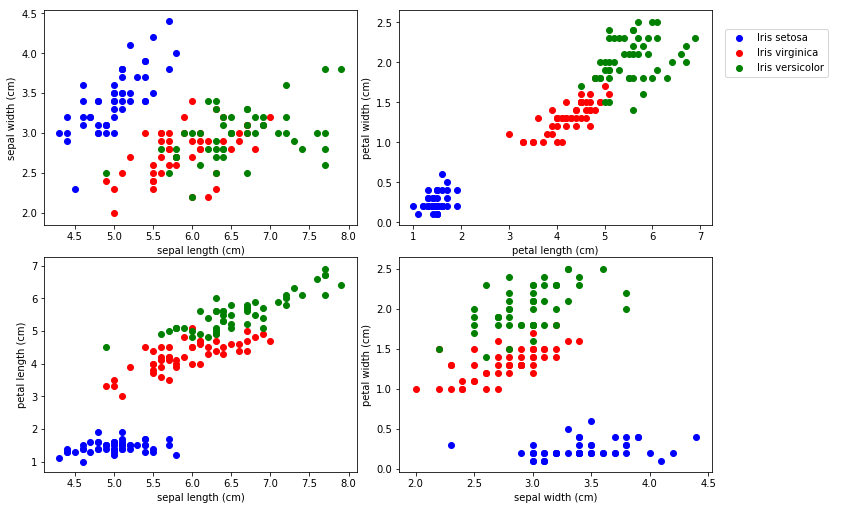

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

## Perform Train/Test/Split

In [ ]:
X = df.drop('target',axis=1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# y_train = F.one_hot(torch.LongTensor(y_train))  # not needed with Cross Entropy Loss
# y_test = F.one_hot(torch.LongTensor(y_test))
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

## Prepare DataLoader
For this analysis we don't need to create a Dataset object, but we should take advantage of PyTorch's DataLoader tool. Even though our dataset is small (120 training samples), we'll load it into our model in two batches. This technique becomes very helpful with large datasets.

Note that scikit-learn already shuffled the source dataset before preparing train and test sets. We'll still benefit from the DataLoader shuffle utility for model training if we make multiple passes throught the dataset.

In [ ]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)

testloader = DataLoader(X_test, batch_size=60, shuffle=False)

## Define loss equations and optimizations
As before, we'll utilize <a href='https://en.wikipedia.org/wiki/Cross_entropy'>Cross Entropy</a> with <a href='https://pytorch.org/docs/stable/nn.html#crossentropyloss'><strong><tt>torch.nn.CrossEntropyLoss()</tt></strong></a><br>
For the optimizer, we'll use a variation of Stochastic Gradient Descent called <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam'>Adam</a> (short for Adaptive Moment Estimation), with <a href='https://pytorch.org/docs/stable/optim.html#torch.optim.Adam'><strong><tt>torch.optim.Adam()</tt></strong></a>

In [ ]:
# FOR REDO
torch.manual_seed(4)
model = Model()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## Train the model

In [ ]:
epochs = 100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 1.09568226
epoch: 11  loss: 0.98190653
epoch: 21  loss: 0.75652307
epoch: 31  loss: 0.49447522
epoch: 41  loss: 0.34981874
epoch: 51  loss: 0.22807853
epoch: 61  loss: 0.13547322
epoch: 71  loss: 0.09162075
epoch: 81  loss: 0.07378192
epoch: 91  loss: 0.06546164


## Plot the loss function

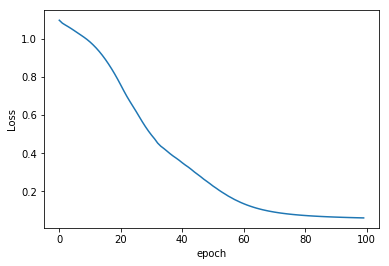

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

## Validate the model
Now we run the test set through the model to see if the loss calculation resembles the training data.

In [ ]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.06246195


In [ ]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val):38}  {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([-0.3355,  7.3630,  1.3783])     1
 2. tensor([0.2775, 8.1554, 0.4269])        1
 3. tensor([ 11.9969,   6.1847, -19.1976])  0
 4. tensor([-2.0187,  7.9664,  4.2447])     1
 5. tensor([-6.1348,  7.9516, 11.0913])     2
 6. tensor([-10.2635,   8.3101,  17.9998])  2
 7. tensor([ 12.0542,   6.4321, -19.2909])  0
 8. tensor([ 12.9507,   6.4819, -20.7540])  0
 9. tensor([-5.7723,  8.2435, 10.5083])     2
10. tensor([-7.8867,  8.6126, 14.0731])     2
11. tensor([-8.7055,  8.6074, 15.4337])     2
12. tensor([ 11.6358,   5.8167, -18.6220])  0
13. tensor([-8.1009,  8.2331, 14.3888])     2
14. tensor([-2.0791,  7.7752,  4.3188])     1
15. tensor([-6.0828,  8.3916, 11.0586])     2
16. tensor([0.1360, 7.8660, 0.6409])        1
17. tensor([-4.0875,  7.7217,  7.6642])     2
18. tensor([ 13.1522,   6.5911, -21.0798])  0
19. tensor([-1.5644,  8.0222,  3.4754])     1
20. tensor([-6.2859,  8.9728, 11.4248])     2
21. tensor([ 12.3859,   6.2571, -19.8275])  0
22. tensor([ 13.8200,   7.0859, -2

Here we can see that #17 was misclassified.

## Save the trained model to a file
Right now <strong><tt>model</tt></strong> has been trained and validated, and seems to correctly classify an iris 97% of the time. Let's save this to disk.<br>
The tools we'll use are <a href='https://pytorch.org/docs/stable/torch.html#torch.save'><strong><tt>torch.save()</tt></strong></a> and <a href='https://pytorch.org/docs/stable/torch.html#torch.load'><strong><tt>torch.load()</tt></strong></a><br>

There are two basic ways to save a model.<br>

The first saves/loads the `state_dict` (learned parameters) of the model, but not the model class. The syntax follows:<br>
<tt><strong>Save:</strong>&nbsp;torch.save(model.state_dict(), PATH)<br><br>
<strong>Load:</strong>&nbsp;model = TheModelClass(\*args, \*\*kwargs)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.load_state_dict(torch.load(PATH))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.eval()</tt>

The second saves the entire model including its class and parameters as a pickle file. Care must be taken if you want to load this into another notebook to make sure all the target data is brought in properly.<br>
<tt><strong>Save:</strong>&nbsp;torch.save(model, PATH)<br><br>
<strong>Load:</strong>&nbsp;model = torch.load(PATH))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.eval()</tt>

In either method, you must call <tt>model.eval()</tt> to set dropout and batch normalization layers to evaluation mode before running inference. Failing to do this will yield inconsistent inference results.

For more information visit https://pytorch.org/tutorials/beginner/saving_loading_models.html

### Save the model

In [ ]:
torch.save(model.state_dict(), 'IrisDatasetModel.pt')

NameError: ignored

### Load a new model
We'll load a new model object and test it as we had before to make sure it worked.

In [ ]:
new_model = Model()
new_model.load_state_dict(torch.load('IrisDatasetModel.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [ ]:
with torch.no_grad():
    y_val = new_model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.06246195


## Apply the model to classify new, unseen data

In [ ]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

Let's plot this new iris in yellow to see where it falls in relation to the others:

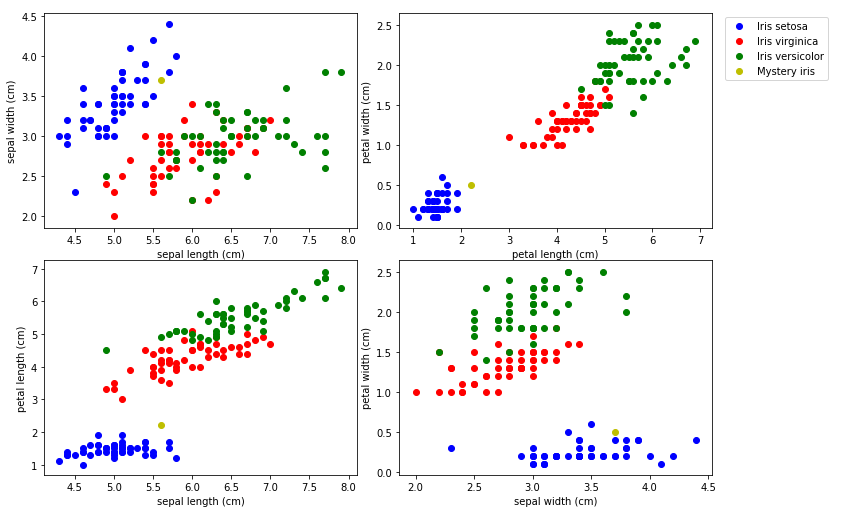

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
    # Add a plot for our mystery iris:
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='y')
    
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

Now run it through the model:

In [ ]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print()
    print(labels[new_model(mystery_iris).argmax()])

tensor([ 12.2116,   7.1285, -19.5247])

Iris setosa


# Full Artificial Neural Network Code Along
In the last section we took in four continuous variables (lengths) to perform a classification. In this section we'll combine continuous and categorical data to perform a regression. The goal is to estimate the cost of a New York City cab ride from several inputs. The inspiration behind this code along is a recent <a href='https://www.kaggle.com/c/new-york-city-taxi-fare-prediction'>Kaggle competition</a>.

<div class="alert alert-success"><strong>NOTE:</strong> In this notebook we'll perform a regression with one output value. In the next one we'll perform a binary classification with two output values.</div>

## Working with tabular data
Deep learning with neural networks is often associated with sophisticated image recognition, and in upcoming sections we'll train models based on properties like pixels patterns and colors.

Here we're working with tabular data (spreadsheets, SQL tables, etc.) with columns of values that may or may not be relevant. As it happens, neural networks can learn to make connections we probably wouldn't have developed on our own. However, to do this we have to handle categorical values separately from continuous ones. Make sure to watch the theory lectures! You'll want to be comfortable with:
* continuous vs. categorical values
* embeddings
* batch normalization
* dropout layers

## Perform standard imports

In [ ]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load the NYC Taxi Fares dataset
The <a href='https://www.kaggle.com/c/new-york-city-taxi-fare-prediction'>Kaggle competition</a> provides a dataset with about 55 million records. The data contains only the pickup date & time, the latitude & longitude (GPS coordinates) of the pickup and dropoff locations, and the number of passengers. It is up to the contest participant to extract any further information. For instance, does the time of day matter? The day of the week? How do we determine the distance traveled from pairs of GPS coordinates?

For this exercise we've whittled the dataset down to just 120,000 records from April 11 to April 24, 2010. The records are randomly sorted. We'll show how to calculate distance from GPS coordinates, and how to create a pandas datatime object from a text column. This will let us quickly get information like day of the week, am vs. pm, etc.

Let's get started!

In [ ]:
df = pd.read_csv('../Data/NYCTaxiFares.csv')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [ ]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

From this we see that fares range from \\$2.50 to \\$49.90, with a mean of \\$10.04 and a median of \\$7.70

## Calculate the distance traveled
The <a href='https://en.wikipedia.org/wiki/Haversine_formula'>haversine formula</a> calculates the distance on a sphere between two sets of GPS coordinates.<br>
Here we assign latitude values with $\varphi$ (phi) and longitude with $\lambda$ (lambda).

The distance formula works out to

${\displaystyle d=2r\arcsin \left({\sqrt {\sin ^{2}\left({\frac {\varphi _{2}-\varphi _{1}}{2}}\right)+\cos(\varphi _{1})\:\cos(\varphi _{2})\:\sin ^{2}\left({\frac {\lambda _{2}-\lambda _{1}}{2}}\right)}}\right)}$

where

$\begin{split} r&: \textrm {radius of the sphere (Earth's radius averages 6371 km)}\\
\varphi_1, \varphi_2&: \textrm {latitudes of point 1 and point 2}\\
\lambda_1, \lambda_2&: \textrm {longitudes of point 1 and point 2}\end{split}$

In [ ]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [ ]:
df['dist_km'] = haversine_distance(df,'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


## Add a datetime column and derive useful statistics
By creating a datetime object, we can extract information like "day of the week", "am vs. pm" etc.
Note that the data was saved in UTC time. Our data falls in April of 2010 which occurred during Daylight Savings Time in New York. For that reason, we'll make an adjustment to EDT using UTC-4 (subtracting four hours).

In [ ]:
df['EDTdate'] = pd.to_datetime(df['pickup_datetime'].str[:19]) - pd.Timedelta(hours=4)
df['Hour'] = df['EDTdate'].dt.hour
df['AMorPM'] = np.where(df['Hour']<12,'am','pm')
df['Weekday'] = df['EDTdate'].dt.strftime("%a")
df.head() 

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56,4,am,Mon
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53,11,am,Sat
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26,7,am,Sat
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03,17,pm,Sun
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01,22,pm,Fri


In [ ]:
df['EDTdate'].min()

Timestamp('2010-04-11 00:00:10')

In [ ]:
df['EDTdate'].max()

Timestamp('2010-04-24 23:59:42')

## Separate categorical from continuous columns

In [ ]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [ ]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'dist_km']
y_col = ['fare_amount']  # this column contains the labels

<div class="alert alert-info"><strong>NOTE:</strong> If you plan to use all of the columns in the data table, there's a shortcut to grab the remaining continuous columns:<br>
<pre style='background-color:rgb(217,237,247)'>cont_cols = [col for col in df.columns if col not in cat_cols + y_col]</pre>

Here we entered the continuous columns explicitly because there are columns we're not running through the model (pickup_datetime and EDTdate)</div>


## Categorify
Pandas offers a <a href='https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html'><strong>category dtype</strong></a> for converting categorical values to numerical codes. A dataset containing months of the year will be assigned 12 codes, one for each month. These will usually be the integers 0 to 11. Pandas replaces the column values with codes, and retains an index list of category values. In the steps ahead we'll call the categorical values "names" and the encodings "codes".

In [ ]:
# Convert our three categorical columns to category dtypes.
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [ ]:
df.dtypes

pickup_datetime              object
fare_amount                 float64
fare_class                    int64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dist_km                     float64
EDTdate              datetime64[ns]
Hour                       category
AMorPM                     category
Weekday                    category
dtype: object

We can see that <tt>df['Hour']</tt> is a categorical feature by displaying some of the rows:

In [ ]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

Here our categorical names are the integers 0 through 23, for a total of 24 unique categories. These values <em>also</em> correspond to the codes assigned to each name.

We can access the category names with <tt>Series.cat.categories</tt> or just the codes with <tt>Series.cat.codes</tt>. This will make more sense if we look at <tt>df['AMorPM']</tt>:

In [ ]:
df['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): [am, pm]

In [ ]:
df['AMorPM'].cat.categories

Index(['am', 'pm'], dtype='object')

In [ ]:
df['AMorPM'].head().cat.codes

0    0
1    0
2    0
3    1
4    1
dtype: int8

In [ ]:
df['Weekday'].cat.categories

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

In [ ]:
df['Weekday'].head().cat.codes

0    1
1    2
2    2
3    3
4    0
dtype: int8

<div class="alert alert-info"><strong>NOTE: </strong>NaN values in categorical data are assigned a code of -1. We don't have any in this particular dataset.</div>

Now we want to combine the three categorical columns into one input array using <a href='https://docs.scipy.org/doc/numpy/reference/generated/numpy.stack.html'><tt>numpy.stack</tt></a> We don't want the Series index, just the values.

In [ ]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

cats = np.stack([hr, ampm, wkdy], 1)

cats[:5]

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       [17,  1,  3],
       [22,  1,  0]], dtype=int8)

<div class="alert alert-info"><strong>NOTE:</strong> This can be done in one line of code using a list comprehension:
<pre style='background-color:rgb(217,237,247)'>cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)</pre>

Don't worry about the dtype for now, we can make it int64 when we convert it to a tensor.</div>


## Convert numpy arrays to tensors

In [ ]:
# Convert categorical variables to a tensor
cats = torch.tensor(cats, dtype=torch.int64) 
# this syntax is ok, since the source data is an array, not an existing tensor

cats[:5]

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3],
        [22,  1,  0]])

We can feed all of our continuous variables into the model as a tensor. Note that we're not normalizing the values here; we'll let the model perform this step.
<div class="alert alert-info"><strong>NOTE:</strong> We have to store <tt>conts</tt> and <tt>y</tt> as Float (float32) tensors, not Double (float64) in order for batch normalization to work properly.</div>

In [ ]:
# Convert continuous variables to a tensor
conts = np.stack([df[col].values for col in cont_cols], 1)
conts = torch.tensor(conts, dtype=torch.float)
conts[:5]

tensor([[ 40.7305, -73.9924,  40.7447, -73.9755,   1.0000,   2.1263],
        [ 40.7406, -73.9901,  40.7441, -73.9742,   1.0000,   1.3923],
        [ 40.7511, -73.9941,  40.7662, -73.9601,   2.0000,   3.3268],
        [ 40.7564, -73.9905,  40.7482, -73.9712,   1.0000,   1.8641],
        [ 40.7342, -73.9910,  40.7431, -73.9060,   1.0000,   7.2313]])

In [ ]:
conts.type()

'torch.FloatTensor'

In [ ]:
# Convert labels to a tensor
y = torch.tensor(df[y_col].values, dtype=torch.float).reshape(-1,1)

y[:5]

tensor([[ 6.5000],
        [ 6.9000],
        [10.1000],
        [ 8.9000],
        [19.7000]])

In [ ]:
cats.shape

torch.Size([120000, 3])

In [ ]:
conts.shape

torch.Size([120000, 6])

In [ ]:
y.shape

torch.Size([120000, 1])

## Set an embedding size
The rule of thumb for determining the embedding size is to divide the number of unique entries in each column by 2, but not to exceed 50.

In [ ]:
# This will set embedding sizes for Hours, AMvsPM and Weekdays
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(24, 12), (2, 1), (7, 4)]

## Define a TabularModel
This somewhat follows the <a href='https://docs.fast.ai/tabular.models.html'>fast.ai library</a> The goal is to define a model based on the number of continuous columns (given by <tt>conts.shape[1]</tt>) plus the number of categorical columns and their embeddings (given by <tt>len(emb_szs)</tt> and <tt>emb_szs</tt> respectively). The output would either be a regression (a single float value), or a classification (a group of bins and their softmax values). For this exercise our output will be a single regression value. Note that we'll assume our data contains both categorical and continuous data. You can add boolean parameters to your own model class to handle a variety of datasets.

<div class="alert alert-info"><strong>Let's walk through the steps we're about to take. See below for more detailed illustrations of the steps.</strong><br>

1. Extend the base Module class, set up the following parameters:
   * <tt>emb_szs: </tt>list of tuples: each categorical variable size is paired with an embedding size
   * <tt>n_cont:  </tt>int: number of continuous variables
   * <tt>out_sz:  </tt>int: output size
   * <tt>layers:  </tt>list of ints: layer sizes
   * <tt>p:       </tt>float: dropout probability for each layer (for simplicity we'll use the same value throughout)
   
<tt><font color=black>class TabularModel(nn.Module):<br>
&nbsp;&nbsp;&nbsp;&nbsp;def \_\_init\_\_(self, emb_szs, n_cont, out_sz, layers, p=0.5):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;super().\_\_init\_\_()</font></tt><br>

2. Set up the embedded layers with <a href='https://pytorch.org/docs/stable/nn.html#modulelist'><tt><strong>torch.nn.ModuleList()</strong></tt></a> and <a href='https://pytorch.org/docs/stable/nn.html#embedding'><tt><strong>torch.nn.Embedding()</strong></tt></a><br>Categorical data will be filtered through these Embeddings in the forward section.<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])</font></tt><br><br>
3. Set up a dropout function for the embeddings with <a href='https://pytorch.org/docs/stable/nn.html#dropout'><tt><strong>torch.nn.Dropout()</strong></tt></a> The default p-value=0.5<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;self.emb_drop = nn.Dropout(emb_drop)</font></tt><br><br>
4. Set up a normalization function for the continuous variables with <a href='https://pytorch.org/docs/stable/nn.html#batchnorm1d'><tt><strong>torch.nn.BatchNorm1d()</strong></tt></a><br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;self.bn_cont = nn.BatchNorm1d(n_cont)</font></tt><br><br>
5. Set up a sequence of neural network layers where each level includes a Linear function, an activation function (we'll use <a href='https://pytorch.org/docs/stable/nn.html#relu'><strong>ReLU</strong></a>), a normalization step, and a dropout layer. We'll combine the list of layers with <a href='https://pytorch.org/docs/stable/nn.html#sequential'><tt><strong>torch.nn.Sequential()</strong></tt></a><br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;self.bn_cont = nn.BatchNorm1d(n_cont)<br>
&nbsp;&nbsp;&nbsp;&nbsp;layerlist = []<br>
&nbsp;&nbsp;&nbsp;&nbsp;n_emb = sum((nf for ni,nf in emb_szs))<br>
&nbsp;&nbsp;&nbsp;&nbsp;n_in = n_emb + n_cont<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;for i in layers:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.Linear(n_in,i)) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.ReLU(inplace=True))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.BatchNorm1d(i))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.Dropout(p))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;n_in = i<br>
&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.Linear(layers[-1],out_sz))<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;self.layers = nn.Sequential(*layerlist)</font></tt><br><br>
6. Define the forward method. Preprocess the embeddings and normalize the continuous variables before passing them through the layers.<br>Use <a href='https://pytorch.org/docs/stable/torch.html#torch.cat'><tt><strong>torch.cat()</strong></tt></a> to combine multiple tensors into one.<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;def forward(self, x_cat, x_cont):<br>
&nbsp;&nbsp;&nbsp;&nbsp;embeddings = []<br>
&nbsp;&nbsp;&nbsp;&nbsp;for i,e in enumerate(self.embeds):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;embeddings.append(e(x_cat[:,i]))<br>
&nbsp;&nbsp;&nbsp;&nbsp;x = torch.cat(embeddings, 1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;x = self.emb_drop(x)<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;x_cont = self.bn_cont(x_cont)<br>
&nbsp;&nbsp;&nbsp;&nbsp;x = torch.cat([x, x_cont], 1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;x = self.layers(x)<br>
&nbsp;&nbsp;&nbsp;&nbsp;return x</font></tt>
</div>

<div class="alert alert-danger"><strong>Breaking down the embeddings steps</strong> (this code is for illustration purposes only.)</div>

In [ ]:
# This is our source data
catz = cats[:4]
catz

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3]])

In [ ]:
# This is passed in when the model is instantiated
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [ ]:
# This is assigned inside the __init__() method
selfembeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [ ]:
list(enumerate(selfembeds))

[(0, Embedding(24, 12)), (1, Embedding(2, 1)), (2, Embedding(7, 4))]

In [ ]:
# This happens inside the forward() method
embeddingz = []
for i,e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))
embeddingz

[tensor([[ 0.7031,  0.5132, -1.0168,  1.3594,  0.7909, -1.2648,  0.9565,  0.6827,
           0.4922,  0.1282, -0.9863,  0.2622],
         [ 0.0402, -0.8209,  2.5186,  0.5037,  0.0925,  0.0058,  1.0398,  1.7655,
           0.0216, -0.1349, -1.0968,  1.4534],
         [ 0.5162, -0.6815,  1.4828,  0.1271,  1.1672,  0.8569,  1.1472,  0.7672,
           0.4720,  1.3629,  1.2446,  0.3470],
         [ 0.1047,  0.2153, -1.4652, -1.6907, -0.0670,  0.9863,  0.7836, -1.3762,
           1.6670,  0.1276,  1.2241,  0.1415]], grad_fn=<EmbeddingBackward>),
 tensor([[-1.1156],
         [-1.1156],
         [-1.1156],
         [-0.7577]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.8579, -0.4516,  0.3814,  0.9935],
         [ 0.6264, -1.1347,  1.9039,  1.1867],
         [ 0.6264, -1.1347,  1.9039,  1.1867],
         [ 0.1609, -0.1231,  0.5787, -0.3180]], grad_fn=<EmbeddingBackward>)]

In [ ]:
# We concatenate the embedding sections (12,1,4) into one (17)
z = torch.cat(embeddingz, 1)
z

tensor([[ 0.7031,  0.5132, -1.0168,  1.3594,  0.7909, -1.2648,  0.9565,  0.6827,
          0.4922,  0.1282, -0.9863,  0.2622, -1.1156, -0.8579, -0.4516,  0.3814,
          0.9935],
        [ 0.0402, -0.8209,  2.5186,  0.5037,  0.0925,  0.0058,  1.0398,  1.7655,
          0.0216, -0.1349, -1.0968,  1.4534, -1.1156,  0.6264, -1.1347,  1.9039,
          1.1867],
        [ 0.5162, -0.6815,  1.4828,  0.1271,  1.1672,  0.8569,  1.1472,  0.7672,
          0.4720,  1.3629,  1.2446,  0.3470, -1.1156,  0.6264, -1.1347,  1.9039,
          1.1867],
        [ 0.1047,  0.2153, -1.4652, -1.6907, -0.0670,  0.9863,  0.7836, -1.3762,
          1.6670,  0.1276,  1.2241,  0.1415, -0.7577,  0.1609, -0.1231,  0.5787,
         -0.3180]], grad_fn=<CatBackward>)

In [ ]:
# This was assigned under the __init__() method
selfembdrop = nn.Dropout(.4)

In [ ]:
z = selfembdrop(z)
z

tensor([[ 0.0000,  0.8553, -1.6946,  0.0000,  1.3182, -2.1080,  1.5942,  1.1378,
          0.8204,  0.2137, -1.6438,  0.0000, -0.0000, -1.4298, -0.0000,  0.6357,
          0.0000],
        [ 0.0000, -1.3682,  0.0000,  0.8395,  0.0000,  0.0000,  0.0000,  2.9425,
          0.0359, -0.0000, -1.8280,  2.4223, -0.0000,  0.0000, -1.8912,  3.1731,
          0.0000],
        [ 0.0000, -1.1359,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.2786,
          0.7867,  2.2715,  0.0000,  0.5783, -0.0000,  1.0440, -1.8912,  3.1731,
          0.0000],
        [ 0.0000,  0.3589, -2.4420, -0.0000, -0.1117,  1.6438,  1.3059, -0.0000,
          2.7783,  0.2127,  2.0402,  0.0000, -0.0000,  0.0000, -0.0000,  0.0000,
         -0.5300]], grad_fn=<MulBackward0>)

<div class="alert alert-danger"><strong>This is how the categorical embeddings are passed into the layers.</strong></div>

In [ ]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [ ]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 1, [200,100], p=0.4)

In [ ]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

## Define loss function & optimizer
PyTorch does not offer a built-in <a href='https://en.wikipedia.org/wiki/Root-mean-square_deviation'>RMSE Loss</a> function, and it would be nice to see this in place of MSE.<br>
For this reason, we'll simply apply the <tt>torch.sqrt()</tt> function to the output of MSELoss during training.

In [ ]:
criterion = nn.MSELoss()  # we'll convert this to RMSE later
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Perform train/test splits
At this point our batch size is the entire dataset of 120,000 records. This will take a long time to train, so you might consider reducing this. We'll use 60,000. Recall that our tensors are already randomly shuffled.

In [ ]:
batch_size = 60000
test_size = int(batch_size * .2)

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [ ]:
len(cat_train)

48000

In [ ]:
len(cat_test)

12000

## Train the model
Expect this to take 30 minutes or more! We've added code to tell us the duration at the end.

In [ ]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred, y_train)) # RMSE
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 12.49953079
epoch:  26  loss: 11.52666759
epoch:  51  loss: 10.47162533
epoch:  76  loss: 9.53090382
epoch: 101  loss: 8.72838020
epoch: 126  loss: 7.81538534
epoch: 151  loss: 6.70782852
epoch: 176  loss: 5.48520994
epoch: 201  loss: 4.37029028
epoch: 226  loss: 3.70538783
epoch: 251  loss: 3.51656818
epoch: 276  loss: 3.44707990
epoch: 300  loss: 3.42467499

Duration: 730 seconds


## Plot the loss function

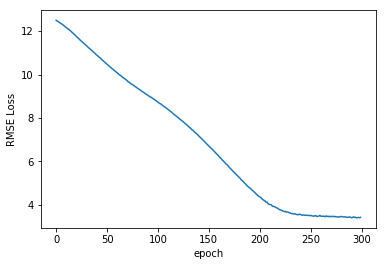

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

## Validate the model
Here we want to run the entire test set through the model, and compare it to the known labels.<br>
For this step we don't want to update weights and biases, so we set <tt>torch.no_grad()</tt>

In [ ]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = torch.sqrt(criterion(y_val, y_test))
print(f'RMSE: {loss:.8f}')

RMSE: 3.34590030


This means that on average, predicted values are within &plusmn;$3.31 of the actual value.

Now let's look at the first 50 predicted values:

In [ ]:
print(f'{"PREDICTED":>12} {"ACTUAL":>8} {"DIFF":>8}')
for i in range(50):
    diff = np.abs(y_val[i].item()-y_test[i].item())
    print(f'{i+1:2}. {y_val[i].item():8.4f} {y_test[i].item():8.4f} {diff:8.4f}')

   PREDICTED   ACTUAL     DIFF
 1.   2.5379   2.9000   0.3621
 2.  25.1634   5.7000  19.4634
 3.   6.3749   7.7000   1.3251
 4.  13.4677  12.5000   0.9677
 5.   4.4992   4.1000   0.3992
 6.   4.8968   5.3000   0.4032
 7.   3.1796   3.7000   0.5204
 8.  17.7814  14.5000   3.2814
 9.   6.1348   5.7000   0.4348
10.  12.0325  10.1000   1.9325
11.   6.1323   4.5000   1.6323
12.   6.9208   6.1000   0.8208
13.   5.9448   6.9000   0.9552
14.  13.4625  14.1000   0.6375
15.   5.9277   4.5000   1.4277
16.  27.5778  34.1000   6.5222
17.   3.2774  12.5000   9.2226
18.   5.7506   4.1000   1.6506
19.   8.1940   8.5000   0.3060
20.   6.2858   5.3000   0.9858
21.  13.6693  11.3000   2.3693
22.   9.6759  10.5000   0.8241
23.  16.0568  15.3000   0.7568
24.  19.3310  14.9000   4.4310
25.  48.6873  49.5700   0.8827
26.   6.3257   5.3000   1.0257
27.   6.0392   3.7000   2.3392
28.   7.1921   6.5000   0.6921
29.  14.9567  14.1000   0.8567
30.   6.7476   4.9000   1.8476
31.   4.3447   3.7000   0.6447
32.  35.

So while many predictions were off by a few cents, some were off by \\$19.00. Feel free to change the batch size, test size, and number of epochs to obtain a better model.

## Save the model
We can save a trained model to a file in case we want to come back later and feed new data through it. The best practice is to save the state of the model (weights & biases) and not the full definition. Also, we want to ensure that only a trained model is saved, to prevent overwriting a previously saved model with an untrained one.<br>For more information visit <a href='https://pytorch.org/tutorials/beginner/saving_loading_models.html'>https://pytorch.org/tutorials/beginner/saving_loading_models.html</a>

In [ ]:
# Make sure to save the model only after the training has happened!
if len(losses) == epochs:
    torch.save(model.state_dict(), 'TaxiFareRegrModel.pt')
else:
    print('Model has not been trained. Consider loading a trained model instead.')

## Loading a saved model (starting from scratch)
We can load the trained weights and biases from a saved model. If we've just opened the notebook, we'll have to run standard imports and function definitions. To demonstrate, restart the kernel before proceeding.

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

def haversine_distance(df, lat1, long1, lat2, long2):
    r = 6371
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return r * c

class TabularModel(nn.Module):
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        self.layers = nn.Sequential(*layerlist)
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        return self.layers(x)

Now define the model. Before we can load the saved settings, we need to instantiate our TabularModel with the parameters we used before (embedding sizes, number of continuous columns, output size, layer sizes, and dropout layer p-value). 

In [ ]:
emb_szs = [(24, 12), (2, 1), (7, 4)]
model2 = TabularModel(emb_szs, 6, 1, [200,100], p=0.4)

Once the model is set up, loading the saved settings is a snap.

In [ ]:
model2.load_state_dict(torch.load('TaxiFareRegrModel.pt'));
model2.eval() # be sure to run this step!

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

Next we'll define a function that takes in new parameters from the user, performs all of the preprocessing steps above, and passes the new data through our trained model.

In [ ]:
def test_data(mdl): # pass in the name of the new model
    # INPUT NEW DATA
    plat = float(input('What is the pickup latitude?  '))
    plong = float(input('What is the pickup longitude? '))
    dlat = float(input('What is the dropoff latitude?  '))
    dlong = float(input('What is the dropoff longitude? '))
    psngr = int(input('How many passengers? '))
    dt = input('What is the pickup date and time?\nFormat as YYYY-MM-DD HH:MM:SS     ')
    
    # PREPROCESS THE DATA
    dfx_dict = {'pickup_latitude':plat,'pickup_longitude':plong,'dropoff_latitude':dlat,
         'dropoff_longitude':dlong,'passenger_count':psngr,'EDTdate':dt}
    dfx = pd.DataFrame(dfx_dict, index=[0])
    dfx['dist_km'] = haversine_distance(dfx,'pickup_latitude', 'pickup_longitude',
                                        'dropoff_latitude', 'dropoff_longitude')
    dfx['EDTdate'] = pd.to_datetime(dfx['EDTdate'])
    
    # We can skip the .astype(category) step since our fields are small,
    # and encode them right away
    dfx['Hour'] = dfx['EDTdate'].dt.hour
    dfx['AMorPM'] = np.where(dfx['Hour']<12,0,1) 
    dfx['Weekday'] = dfx['EDTdate'].dt.strftime("%a")
    dfx['Weekday'] = dfx['Weekday'].replace(['Fri','Mon','Sat','Sun','Thu','Tue','Wed'],
                                            [0,1,2,3,4,5,6]).astype('int64')
    # CREATE CAT AND CONT TENSORS
    cat_cols = ['Hour', 'AMorPM', 'Weekday']
    cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
                 'dropoff_longitude', 'passenger_count', 'dist_km']
    xcats = np.stack([dfx[col].values for col in cat_cols], 1)
    xcats = torch.tensor(xcats, dtype=torch.int64)
    xconts = np.stack([dfx[col].values for col in cont_cols], 1)
    xconts = torch.tensor(xconts, dtype=torch.float)
    
    # PASS NEW DATA THROUGH THE MODEL WITHOUT PERFORMING A BACKPROP
    with torch.no_grad():
        z = mdl(xcats, xconts)
    print(f'\nThe predicted fare amount is ${z.item():.2f}')

## Feed new data through the trained model
For convenience, here are the max and min values for each of the variables:
<table style="display: inline-block">
<tr><th>Column</th><th>Minimum</th><th>Maximum</th></tr>
<tr><td>pickup_latitude</td><td>40</td><td>41</td></tr>
<tr><td>pickup_longitude</td><td>-74.5</td><td>-73.3</td></tr>
<tr><td>dropoff_latitude</td><td>40</td><td>41</td></tr>
<tr><td>dropoff_longitude</td><td>-74.5</td><td>-73.3</td></tr>
<tr><td>passenger_count</td><td>1</td><td>5</td></tr>
<tr><td>EDTdate</td><td>2010-04-11 00:00:00</td><td>2010-04-24 23:59:42</td></tr>

<strong>Use caution!</strong> The distance between 1 degree of latitude (from 40 to 41) is 111km (69mi) and between 1 degree of longitude (from -73 to -74) is 85km (53mi). The longest cab ride in the dataset spanned a difference of only 0.243 degrees latitude and 0.284 degrees longitude. The mean difference for both latitude and longitude was about 0.02. To get a fair prediction, use values that fall close to one another.

In [ ]:
z = test_data(model2)

What is the pickup latitude?  40.5
What is the pickup longitude? -73.9
What is the dropoff latitude?  40.52
What is the dropoff longitude? -73.92
How many passengers? 2
What is the pickup date and time?
Format as YYYY-MM-DD HH:MM:SS     2010-04-15 16:00:00

The predicted fare amount is $13.86


# Full Artificial Neural Network Code Along - CLASSIFICATION
In the last section we took in four continuous variables (lengths) to perform a classification. In this section we'll combine continuous and categorical data to perform a similar classification. The goal is to estimate the relative cost of a New York City cab ride from several inputs. The inspiration behind this code along is a recent <a href='https://www.kaggle.com/c/new-york-city-taxi-fare-prediction'>Kaggle competition</a>.

<div class="alert alert-success"><strong>NOTE:</strong> This notebook differs from the previous regression notebook in that it uses <tt>'fare_class'</tt> for the <tt><strong>y</strong></tt> set, and the output contains two values instead of one. In this exercise we're training our model to perform a binary classification, and predict whether a fare is greater or less than $10.00.</div>

## Working with tabular data
Deep learning with neural networks is often associated with sophisticated image recognition, and in upcoming sections we'll train models based on properties like pixels patterns and colors.

Here we're working with tabular data (spreadsheets, SQL tables, etc.) with columns of values that may or may not be relevant. As it happens, neural networks can learn to make connections we probably wouldn't have developed on our own. However, to do this we have to handle categorical values separately from continuous ones. Make sure to watch the theory lectures! You'll want to be comfortable with:
* continuous vs. categorical values
* embeddings
* batch normalization
* dropout layers

## Perform standard imports

In [ ]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load the NYC Taxi Fares dataset
The <a href='https://www.kaggle.com/c/new-york-city-taxi-fare-prediction'>Kaggle competition</a> provides a dataset with about 55 million records. The data contains only the pickup date & time, the latitude & longitude (GPS coordinates) of the pickup and dropoff locations, and the number of passengers. It is up to the contest participant to extract any further information. For instance, does the time of day matter? The day of the week? How do we determine the distance traveled from pairs of GPS coordinates?

For this exercise we've whittled the dataset down to just 120,000 records from April 11 to April 24, 2010. The records are randomly sorted. We'll show how to calculate distance from GPS coordinates, and how to create a pandas datatime object from a text column. This will let us quickly get information like day of the week, am vs. pm, etc.

Let's get started!

In [ ]:
df = pd.read_csv('../Data/NYCTaxiFares.csv')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [ ]:
df['fare_class'].value_counts()

0    80000
1    40000
Name: fare_class, dtype: int64

Conveniently, 2/3 of the data have fares under \\$10, and 1/3 have fares \\$10 and above.

Fare classes correspond to fare amounts as follows:
<table style="display: inline-block">
<tr><th>Class</th><th>Values</th></tr>
<tr><td>0</td><td>< \$10.00</td></tr>
<tr><td>1</td><td>>= \$10.00</td></tr>
</table>

## Calculate the distance traveled
The <a href='https://en.wikipedia.org/wiki/Haversine_formula'>haversine formula</a> calculates the distance on a sphere between two sets of GPS coordinates.<br>
Here we assign latitude values with $\varphi$ (phi) and longitude with $\lambda$ (lambda).

The distance formula works out to

${\displaystyle d=2r\arcsin \left({\sqrt {\sin ^{2}\left({\frac {\varphi _{2}-\varphi _{1}}{2}}\right)+\cos(\varphi _{1})\:\cos(\varphi _{2})\:\sin ^{2}\left({\frac {\lambda _{2}-\lambda _{1}}{2}}\right)}}\right)}$

where

$\begin{split} r&: \textrm {radius of the sphere (Earth's radius averages 6371 km)}\\
\varphi_1, \varphi_2&: \textrm {latitudes of point 1 and point 2}\\
\lambda_1, \lambda_2&: \textrm {longitudes of point 1 and point 2}\end{split}$

In [ ]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [ ]:
df['dist_km'] = haversine_distance(df,'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


## Add a datetime column and derive useful statistics
By creating a datetime object, we can extract information like "day of the week", "am vs. pm" etc.
Note that the data was saved in UTC time. Our data falls in April of 2010 which occurred during Daylight Savings Time in New York. For that reason, we'll make an adjustment to EDT using UTC-4 (subtracting four hours).

In [ ]:
df['EDTdate'] = pd.to_datetime(df['pickup_datetime'].str[:19]) - pd.Timedelta(hours=4)
df['Hour'] = df['EDTdate'].dt.hour
df['AMorPM'] = np.where(df['Hour']<12,'am','pm')
df['Weekday'] = df['EDTdate'].dt.strftime("%a")
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56,4,am,Mon
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53,11,am,Sat
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26,7,am,Sat
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03,17,pm,Sun
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01,22,pm,Fri


In [ ]:
df['EDTdate'].min()

Timestamp('2010-04-11 00:00:10')

In [ ]:
df['EDTdate'].max()

Timestamp('2010-04-24 23:59:42')

## Separate categorical from continuous columns

In [ ]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [ ]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'dist_km']
y_col = ['fare_class']  # this column contains the labels

<div class="alert alert-info"><strong>NOTE:</strong> If you plan to use all of the columns in the data table, there's a shortcut to grab the remaining continuous columns:<br>
<pre style='background-color:rgb(217,237,247)'>cont_cols = [col for col in df.columns if col not in cat_cols + y_col]</pre>

Here we entered the continuous columns explicitly because there are columns we're not running through the model (fare_amount and EDTdate)</div>

## Categorify
Pandas offers a <a href='https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html'><strong>category dtype</strong></a> for converting categorical values to numerical codes. A dataset containing months of the year will be assigned 12 codes, one for each month. These will usually be the integers 0 to 11. Pandas replaces the column values with codes, and retains an index list of category values. In the steps ahead we'll call the categorical values "names" and the encodings "codes".

In [ ]:
# Convert our three categorical columns to category dtypes.
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [ ]:
df.dtypes

pickup_datetime              object
fare_amount                 float64
fare_class                    int64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dist_km                     float64
EDTdate              datetime64[ns]
Hour                       category
AMorPM                     category
Weekday                    category
dtype: object

We can see that <tt>df['Hour']</tt> is a categorical feature by displaying some of the rows:

In [ ]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

Here our categorical names are the integers 0 through 23, for a total of 24 unique categories. These values <em>also</em> correspond to the codes assigned to each name.

We can access the category names with <tt>Series.cat.categories</tt> or just the codes with <tt>Series.cat.codes</tt>. This will make more sense if we look at <tt>df['AMorPM']</tt>:

In [ ]:
df['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): [am, pm]

In [ ]:
df['AMorPM'].cat.categories

Index(['am', 'pm'], dtype='object')

In [ ]:
df['AMorPM'].head().cat.codes

0    0
1    0
2    0
3    1
4    1
dtype: int8

In [ ]:
df['Weekday'].cat.categories

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

In [ ]:
df['Weekday'].head().cat.codes

0    1
1    2
2    2
3    3
4    0
dtype: int8

<div class="alert alert-info"><strong>NOTE: </strong>NaN values in categorical data are assigned a code of -1. We don't have any in this particular dataset.</div>

Now we want to combine the three categorical columns into one input array using <a href='https://docs.scipy.org/doc/numpy/reference/generated/numpy.stack.html'><tt>numpy.stack</tt></a> We don't want the Series index, just the values.

In [ ]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

cats = np.stack([hr, ampm, wkdy], 1)

cats[:5]

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       [17,  1,  3],
       [22,  1,  0]], dtype=int8)

<div class="alert alert-info"><strong>NOTE:</strong> This can be done in one line of code using a list comprehension:
<pre style='background-color:rgb(217,237,247)'>cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)</pre>

Don't worry about the dtype for now, we can make it int64 when we convert it to a tensor.</div>


## Convert numpy arrays to tensors

In [ ]:
# Convert categorical variables to a tensor
cats = torch.tensor(cats, dtype=torch.int64)
# this syntax is ok, since the source data is an array, not an existing tensor

cats[:5]

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3],
        [22,  1,  0]])

We can feed all of our continuous variables into the model as a tensor. We're not normalizing the values here; we'll let the model perform this step.
<div class="alert alert-info"><strong>NOTE:</strong> We have to store <tt>conts</tt> and <tt>y</tt> as Float (float32) tensors, not Double (float64) in order for batch normalization to work properly.</div>

In [ ]:
# Convert continuous variables to a tensor
conts = np.stack([df[col].values for col in cont_cols], 1)
conts = torch.tensor(conts, dtype=torch.float)
conts[:5]

tensor([[ 40.7305, -73.9924,  40.7447, -73.9755,   1.0000,   2.1263],
        [ 40.7406, -73.9901,  40.7441, -73.9742,   1.0000,   1.3923],
        [ 40.7511, -73.9941,  40.7662, -73.9601,   2.0000,   3.3268],
        [ 40.7564, -73.9905,  40.7482, -73.9712,   1.0000,   1.8641],
        [ 40.7342, -73.9910,  40.7431, -73.9060,   1.0000,   7.2313]])

In [ ]:
conts.type()

'torch.FloatTensor'

Note: the CrossEntropyLoss function we'll use below expects a 1d y-tensor, so we'll replace <tt>.reshape(-1,1)</tt> with <tt>.flatten()</tt> this time.

In [ ]:
# Convert labels to a tensor
y = torch.tensor(df[y_col].values).flatten()

y[:5]

tensor([0, 0, 1, 0, 1])

In [ ]:
cats.shape

torch.Size([120000, 3])

In [ ]:
conts.shape

torch.Size([120000, 6])

In [ ]:
y.shape

torch.Size([120000])

## Set an embedding size
The rule of thumb for determining the embedding size is to divide the number of unique entries in each column by 2, but not to exceed 50.

In [ ]:
# This will set embedding sizes for Hours, AMvsPM and Weekdays
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(24, 12), (2, 1), (7, 4)]

## Define a TabularModel
This somewhat follows the <a href='https://docs.fast.ai/tabular.models.html'>fast.ai library</a> The goal is to define a model based on the number of continuous columns (given by <tt>conts.shape[1]</tt>) plus the number of categorical columns and their embeddings (given by <tt>len(emb_szs)</tt> and <tt>emb_szs</tt> respectively). The output would either be a regression (a single float value), or a classification (a group of bins and their softmax values). For this exercise our output will be a single regression value. Note that we'll assume our data contains both categorical and continuous data. You can add boolean parameters to your own model class to handle a variety of datasets.

<div class="alert alert-info"><strong>Let's walk through the steps we're about to take. See below for more detailed illustrations of the steps.</strong><br>

1. Extend the base Module class, set up the following parameters:
   * <tt>emb_szs: </tt>list of tuples: each categorical variable size is paired with an embedding size
   * <tt>n_cont:  </tt>int: number of continuous variables
   * <tt>out_sz:  </tt>int: output size
   * <tt>layers:  </tt>list of ints: layer sizes
   * <tt>p:       </tt>float: dropout probability for each layer (for simplicity we'll use the same value throughout)
   
<tt><font color=black>class TabularModel(nn.Module):<br>
&nbsp;&nbsp;&nbsp;&nbsp;def \_\_init\_\_(self, emb_szs, n_cont, out_sz, layers, p=0.5):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;super().\_\_init\_\_()</font></tt><br>

2. Set up the embedded layers with <a href='https://pytorch.org/docs/stable/nn.html#modulelist'><tt><strong>torch.nn.ModuleList()</strong></tt></a> and <a href='https://pytorch.org/docs/stable/nn.html#embedding'><tt><strong>torch.nn.Embedding()</strong></tt></a><br>Categorical data will be filtered through these Embeddings in the forward section.<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])</font></tt><br><br>
3. Set up a dropout function for the embeddings with <a href='https://pytorch.org/docs/stable/nn.html#dropout'><tt><strong>torch.nn.Dropout()</strong></tt></a> The default p-value=0.5<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;self.emb_drop = nn.Dropout(emb_drop)</font></tt><br><br>
4. Set up a normalization function for the continuous variables with <a href='https://pytorch.org/docs/stable/nn.html#batchnorm1d'><tt><strong>torch.nn.BatchNorm1d()</strong></tt></a><br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;self.bn_cont = nn.BatchNorm1d(n_cont)</font></tt><br><br>
5. Set up a sequence of neural network layers where each level includes a Linear function, an activation function (we'll use <a href='https://pytorch.org/docs/stable/nn.html#relu'><strong>ReLU</strong></a>), a normalization step, and a dropout layer. We'll combine the list of layers with <a href='https://pytorch.org/docs/stable/nn.html#sequential'><tt><strong>torch.nn.Sequential()</strong></tt></a><br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;self.bn_cont = nn.BatchNorm1d(n_cont)<br>
&nbsp;&nbsp;&nbsp;&nbsp;layerlist = []<br>
&nbsp;&nbsp;&nbsp;&nbsp;n_emb = sum((nf for ni,nf in emb_szs))<br>
&nbsp;&nbsp;&nbsp;&nbsp;n_in = n_emb + n_cont<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;for i in layers:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.Linear(n_in,i)) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.ReLU(inplace=True))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.BatchNorm1d(i))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.Dropout(p))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;n_in = i<br>
&nbsp;&nbsp;&nbsp;&nbsp;layerlist.append(nn.Linear(layers[-1],out_sz))<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;self.layers = nn.Sequential(*layerlist)</font></tt><br><br>
6. Define the forward method. Preprocess the embeddings and normalize the continuous variables before passing them through the layers.<br>Use <a href='https://pytorch.org/docs/stable/torch.html#torch.cat'><tt><strong>torch.cat()</strong></tt></a> to combine multiple tensors into one.<br>
<tt><font color=black>def forward(self, x_cat, x_cont):<br>
&nbsp;&nbsp;&nbsp;&nbsp;embeddings = []<br>
&nbsp;&nbsp;&nbsp;&nbsp;for i,e in enumerate(self.embeds):<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;embeddings.append(e(x_cat[:,i]))<br>
&nbsp;&nbsp;&nbsp;&nbsp;x = torch.cat(embeddings, 1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;x = self.emb_drop(x)<br>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;x_cont = self.bn_cont(x_cont)<br>
&nbsp;&nbsp;&nbsp;&nbsp;x = torch.cat([x, x_cont], 1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;x = self.layers(x)<br>
&nbsp;&nbsp;&nbsp;&nbsp;return x</font></tt>
</div>

<div class="alert alert-danger"><strong>Breaking down the embeddings steps</strong> (this code is for illustration purposes only.)</div>

In [ ]:
# This is our source data
catz = cats[:4]
catz

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3]])

In [ ]:
# This is passed in when the model is instantiated
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [ ]:
# This is assigned inside the __init__() method
selfembeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [ ]:
list(enumerate(selfembeds))

[(0, Embedding(24, 12)), (1, Embedding(2, 1)), (2, Embedding(7, 4))]

In [ ]:
# This happens inside the forward() method
embeddingz = []
for i,e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))
embeddingz

[tensor([[ 0.0347,  0.3536, -1.2988,  1.6375, -0.0542, -0.2099,  0.3044, -1.2855,
           0.8831, -0.7109, -0.9646, -0.1356],
         [-0.5039, -0.9924,  1.2296, -0.6908,  0.4641, -1.0487,  0.5577, -1.1560,
           0.8318, -0.0834,  1.2123, -0.6210],
         [ 0.3509,  0.2216,  0.3432,  1.4547, -0.8747,  1.6727, -0.6417, -1.0160,
           0.8217, -1.0531,  0.8357, -0.0637],
         [ 0.7978,  0.4566,  1.0926, -0.4095, -0.3366,  1.0216,  0.3601, -0.2927,
           0.3536,  0.2170, -1.4778, -1.1965]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.9676],
         [-0.9676],
         [-0.9676],
         [-1.0656]], grad_fn=<EmbeddingBackward>),
 tensor([[-2.1762,  1.0210,  1.3557, -0.1804],
         [-1.0131,  0.9989, -0.4746, -0.1461],
         [-1.0131,  0.9989, -0.4746, -0.1461],
         [-0.3646, -3.2237, -0.9956,  0.2598]], grad_fn=<EmbeddingBackward>)]

In [ ]:
# We concatenate the embedding sections (12,1,4) into one (17)
z = torch.cat(embeddingz, 1)
z

tensor([[ 0.0347,  0.3536, -1.2988,  1.6375, -0.0542, -0.2099,  0.3044, -1.2855,
          0.8831, -0.7109, -0.9646, -0.1356, -0.9676, -2.1762,  1.0210,  1.3557,
         -0.1804],
        [-0.5039, -0.9924,  1.2296, -0.6908,  0.4641, -1.0487,  0.5577, -1.1560,
          0.8318, -0.0834,  1.2123, -0.6210, -0.9676, -1.0131,  0.9989, -0.4746,
         -0.1461],
        [ 0.3509,  0.2216,  0.3432,  1.4547, -0.8747,  1.6727, -0.6417, -1.0160,
          0.8217, -1.0531,  0.8357, -0.0637, -0.9676, -1.0131,  0.9989, -0.4746,
         -0.1461],
        [ 0.7978,  0.4566,  1.0926, -0.4095, -0.3366,  1.0216,  0.3601, -0.2927,
          0.3536,  0.2170, -1.4778, -1.1965, -1.0656, -0.3646, -3.2237, -0.9956,
          0.2598]], grad_fn=<CatBackward>)

In [ ]:
# This was assigned under the __init__() method
selfembdrop = nn.Dropout(.4)

In [ ]:
z = selfembdrop(z)
z

tensor([[ 0.0000,  0.0000, -2.1647,  0.0000, -0.0000, -0.3498,  0.5073, -2.1424,
          0.0000, -1.1848, -1.6076, -0.2259, -1.6127, -3.6271,  0.0000,  2.2594,
         -0.3007],
        [-0.8398, -0.0000,  0.0000, -0.0000,  0.7734, -1.7478,  0.0000, -1.9267,
          0.0000, -0.1390,  0.0000, -1.0350, -0.0000, -0.0000,  1.6648, -0.0000,
         -0.2435],
        [ 0.0000,  0.3693,  0.5719,  0.0000, -1.4578,  0.0000, -1.0694, -1.6933,
          0.0000, -1.7552,  1.3929, -0.1062, -1.6127, -1.6886,  1.6648, -0.0000,
         -0.0000],
        [ 1.3297,  0.0000,  0.0000, -0.0000, -0.0000,  0.0000,  0.0000, -0.4879,
          0.0000,  0.0000, -2.4631, -1.9941, -1.7760, -0.6077, -5.3728, -1.6593,
          0.4330]], grad_fn=<MulBackward0>)

<div class="alert alert-danger"><strong>This is how the categorical embeddings are passed into the layers.</strong></div>

In [ ]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [ ]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 2, [200,100], p=0.4) # out_sz = 2

In [ ]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4)
    (8): Linear(in_features=100, out_features=2, bias=True)
  )
)

## Define loss function & optimizer
For our classification we'll replace the MSE loss function with <a href='https://pytorch.org/docs/stable/nn.html#crossentropyloss'><strong><tt>torch.nn.CrossEntropyLoss()</tt></strong></a><br>
For the optimizer, we'll continue to use <a href='https://pytorch.org/docs/stable/optim.html#torch.optim.Adam'><strong><tt>torch.optim.Adam()</tt></strong></a>

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Perform train/test splits
At this point our batch size is the entire dataset of 120,000 records. To save time we'll use the first 60,000. Recall that our tensors are already randomly shuffled.

In [ ]:
batch_size = 60000
test_size = 12000

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [ ]:
len(cat_train)

48000

In [ ]:
len(cat_test)

12000

## Train the model
Expect this to take 30 minutes or more! We've added code to tell us the duration at the end.

In [ ]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 0.73441482
epoch:  26  loss: 0.45090991
epoch:  51  loss: 0.35915938
epoch:  76  loss: 0.31940848
epoch: 101  loss: 0.29913244
epoch: 126  loss: 0.28824982
epoch: 151  loss: 0.28091952
epoch: 176  loss: 0.27713534
epoch: 201  loss: 0.27236161
epoch: 226  loss: 0.27171907
epoch: 251  loss: 0.26830241
epoch: 276  loss: 0.26365638
epoch: 300  loss: 0.25949642

Duration: 709 seconds


## Plot the loss function

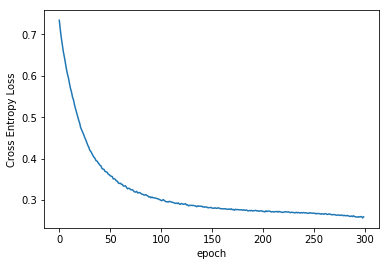

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch');

## Validate the model

In [ ]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.25455481


Now let's look at the first 50 predicted values

In [ ]:
rows = 50
correct = 0
print(f'{"MODEL OUTPUT":26} ARGMAX  Y_TEST')
for i in range(rows):
    print(f'{str(y_val[i]):26} {y_val[i].argmax():^7}{y_test[i]:^7}')
    if y_val[i].argmax().item() == y_test[i]:
        correct += 1
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')

MODEL OUTPUT               ARGMAX  Y_TEST
tensor([ 1.8140, -1.6443])    0      0   
tensor([-1.8268,  2.6373])    1      0   
tensor([ 1.4028, -1.9248])    0      0   
tensor([-1.9130,  1.4853])    1      1   
tensor([ 1.1757, -2.4964])    0      0   
tensor([ 2.0996, -2.2990])    0      0   
tensor([ 1.3226, -1.8349])    0      0   
tensor([-1.6211,  2.3889])    1      1   
tensor([ 2.2489, -2.4253])    0      0   
tensor([-0.4459,  1.1358])    1      1   
tensor([ 1.5145, -2.1619])    0      0   
tensor([ 0.7704, -1.9443])    0      0   
tensor([ 0.9637, -1.3796])    0      0   
tensor([-1.3527,  1.7322])    1      1   
tensor([ 1.4110, -2.4595])    0      0   
tensor([-1.4455,  2.6081])    1      1   
tensor([ 2.2798, -2.5864])    0      1   
tensor([ 1.4585, -2.7982])    0      0   
tensor([ 0.3342, -0.8995])    0      0   
tensor([ 2.0525, -1.9737])    0      0   
tensor([-1.3571,  2.1911])    1      1   
tensor([-0.4669,  0.2872])    1      1   
tensor([-2.0624,  2.2875])    1   

## Save the model
Save the trained model to a file in case you want to come back later and feed new data through it.

In [ ]:
# Make sure to save the model only after the training has happened!
if len(losses) == epochs:
    torch.save(model.state_dict(), 'TaxiFareClssModel.pt')
else:
    print('Model has not been trained. Consider loading a trained model instead.')

## Loading a saved model (starting from scratch)
We can load the trained weights and biases from a saved model. If we've just opened the notebook, we'll have to run standard imports and function definitions. To demonstrate, restart the kernel before proceeding.

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

def haversine_distance(df, lat1, long1, lat2, long2):
    r = 6371
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return r * c

class TabularModel(nn.Module):
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        self.layers = nn.Sequential(*layerlist)
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        return self.layers(x)

Now define the model. Before we can load the saved settings, we need to instantiate our TabularModel with the parameters we used before (embedding sizes, number of continuous columns, output size, layer sizes, and dropout layer p-value). 

In [ ]:
emb_szs = [(24, 12), (2, 1), (7, 4)]
model2 = TabularModel(emb_szs, 6, 2, [200,100], p=0.4)

Once the model is set up, loading the saved settings is a snap.

In [ ]:
model2.load_state_dict(torch.load('TaxiFareClssModel.pt'));
model2.eval() # be sure to run this step!

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4)
    (8): Linear(in_features=100, out_features=2, bias=True)
  )
)

Next we'll define a function that takes in new parameters from the user, performs all of the preprocessing steps above, and passes the new data through our trained model.

In [ ]:
def test_data(mdl): # pass in the name of the new model
    # INPUT NEW DATA
    plat = float(input('What is the pickup latitude?  '))
    plong = float(input('What is the pickup longitude? '))
    dlat = float(input('What is the dropoff latitude?  '))
    dlong = float(input('What is the dropoff longitude? '))
    psngr = int(input('How many passengers? '))
    dt = input('What is the pickup date and time?\nFormat as YYYY-MM-DD HH:MM:SS     ')
    
    # PREPROCESS THE DATA
    dfx_dict = {'pickup_latitude':plat,'pickup_longitude':plong,'dropoff_latitude':dlat,
         'dropoff_longitude':dlong,'passenger_count':psngr,'EDTdate':dt}
    dfx = pd.DataFrame(dfx_dict, index=[0])
    dfx['dist_km'] = haversine_distance(dfx,'pickup_latitude', 'pickup_longitude',
                                        'dropoff_latitude', 'dropoff_longitude')
    dfx['EDTdate'] = pd.to_datetime(dfx['EDTdate'])
    
    # We can skip the .astype(category) step since our fields are small,
    # and encode them right away
    dfx['Hour'] = dfx['EDTdate'].dt.hour
    dfx['AMorPM'] = np.where(dfx['Hour']<12,0,1) 
    dfx['Weekday'] = dfx['EDTdate'].dt.strftime("%a")
    dfx['Weekday'] = dfx['Weekday'].replace(['Fri','Mon','Sat','Sun','Thu','Tue','Wed'],
                                            [0,1,2,3,4,5,6]).astype('int64')
    # CREATE CAT AND CONT TENSORS
    cat_cols = ['Hour', 'AMorPM', 'Weekday']
    cont_cols = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
                 'dropoff_longitude', 'passenger_count', 'dist_km']
    xcats = np.stack([dfx[col].values for col in cat_cols], 1)
    xcats = torch.tensor(xcats, dtype=torch.int64)
    xconts = np.stack([dfx[col].values for col in cont_cols], 1)
    xconts = torch.tensor(xconts, dtype=torch.float)
    
    # PASS NEW DATA THROUGH THE MODEL WITHOUT PERFORMING A BACKPROP
    with torch.no_grad():
        z = mdl(xcats, xconts).argmax().item()
    print(f'\nThe predicted fare class is {z}')

## Feed new data through the trained model
For convenience, here are the max and min values for each of the variables:
<table style="display: inline-block">
<tr><th>Column</th><th>Minimum</th><th>Maximum</th></tr>
<tr><td>pickup_latitude</td><td>40</td><td>41</td></tr>
<tr><td>pickup_longitude</td><td>-74.5</td><td>-73.3</td></tr>
<tr><td>dropoff_latitude</td><td>40</td><td>41</td></tr>
<tr><td>dropoff_longitude</td><td>-74.5</td><td>-73.3</td></tr>
<tr><td>passenger_count</td><td>1</td><td>5</td></tr>
<tr><td>EDTdate</td><td>2010-04-11 00:00:00</td><td>2010-04-24 23:59:42</td></tr>

<strong>Use caution!</strong> The distance between 1 degree of latitude (from 40 to 41) is 111km (69mi) and between 1 degree of longitude (from -73 to -74) is 85km (53mi). The longest cab ride in the dataset spanned a difference of only 0.243 degrees latitude and 0.284 degrees longitude. The mean difference for both latitude and longitude was about 0.02. To get a fair prediction, use values that fall close to one another.

In [ ]:
test_data(model2)

What is the pickup latitude?  40.5
What is the pickup longitude? -73.9
What is the dropoff latitude?  40.52
What is the dropoff longitude? -73.92
How many passengers? 2
What is the pickup date and time?
Format as YYYY-MM-DD HH:MM:SS     2010-04-15 16:00:00

The predicted fare class is 1


# Saving and Loading Trained Models
Refer back to this notebook as a refresher on saving and loading models.

## Saving a trained model
Save a trained model to a file in case you want to come back later and feed new data through it.


To save a trained model called "model" to a file called "MyModel.pt":

In [ ]:
torch.save(model.state_dict(), 'MyModel.pt')

To ensure the model has been trained before saving (assumes the variables "losses" and "epochs" have been defined):

In [ ]:
if len(losses) == epochs:
    torch.save(model.state_dict(), 'MyModel.pt')
else:
    print('Model has not been trained. Consider loading a trained model instead.')

## Loading a saved model (starting from scratch)
We can load the trained weights and biases from a saved model. If we've just opened the notebook, we'll have to run standard imports and function definitions.

### 1. Perform standard imports
These will depend on the scope of the model, chosen displays, metrics, etc.

In [ ]:
# Perform standard imports
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

### 2. Run the model definition
We'll introduce the model shown below in the next section.

In [ ]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=784, out_sz=10, layers=[120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
    
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

### 3. Instantiate the model, load parameters
First we instantiate the model, then we load the pre-trained weights & biases, and finally we set the model to "eval" mode to prevent any further backprops.

In [ ]:
model2 = MultilayerPerceptron()
model2.load_state_dict(torch.load('MyModel.pt'));
model2.eval() # be sure to run this step!

## That's it!
Toward the end of the CNN section we'll show how to import a trained model and adapt it to a new set of image data.

# Basic RNN - Recurrent Neural Networks
Up to now we've used neural networks to classify static images. What happens when the thing we're trying to explain changes over time? What if a predicted value depends on a series of past behaviors?

We can train networks to tell us that an image contains a car.<br>

How do we answer the question "Is the car moving? Where will it be a minute from now?"

This challenge of incorporating a series of measurements over time into the model parameters is addressed by <a href='https://en.wikipedia.org/wiki/Recurrent_neural_network'>Recurrent Neural Networks</a> (RNNs).

Be sure to watch the theory lectures. You should be comfortable with:
* conditional memory
* deep sequence modeling
* vanishing gradients
* gated cells
* long short-term memory (LSTM) cells

PyTorch offers a number of RNN layers and options.<br>
* <a href='https://pytorch.org/docs/stable/nn.html#rnn'><tt><strong>torch.nn.RNN()</strong></tt></a> provides a basic model which applies a multilayer RNN with either <em>tanh</em> or <em>ReLU</em> non-linearity functions to an input sequence.<br>
As we learned in the theory lectures, however, this has its limits.<br><br>
* <a href='https://pytorch.org/docs/stable/nn.html#lstm'><tt><strong>torch.nn.LSTM()</strong></tt></a> adds a multi-layer long short-term memory (LSTM) process which greatly extends the memory of the RNN.

## Advantages of an LSTM
For each element in the input sequence, an LSTM layer computes the following functions:<br>
$\begin{array}{ll} \\
    i_t = \sigma(W_{ii} x_t + b_{ii} + W_{hi} h_{(t-1)} + b_{hi}) \\
    f_t = \sigma(W_{if} x_t + b_{if} + W_{hf} h_{(t-1)} + b_{hf}) \\
    g_t = \tanh(W_{ig} x_t + b_{ig} + W_{hg} h_{(t-1)} + b_{hg}) \\
    o_t = \sigma(W_{io} x_t + b_{io} + W_{ho} h_{(t-1)} + b_{ho}) \\
    c_t = f_t * c_{(t-1)} + i_t * g_t \\
    h_t = o_t * \tanh(c_t) \\
\end{array}$

where $h_t$ is the hidden state at time $t$, <br>
$c_t$ is the cell state at time $t$, <br>
$x_t$ is the input at time $t$, <br>
$h_{(t-1)}$ is the hidden state of the layer at time $t-1$ or the initial hidden state at time $0$, and <br>
$i_t, f_t, g_t, o_t$ are the input, forget, cell, and output gates, respectively.<br>
$\sigma$ is the sigmoid function, and $*$ is the Hadamard product.

<img style="display: inline-block" src="../Images/LSTM-graphic.png" alt="LSTM Graphic" width="500">

To demonstrate the potential of LSTMs, we'll look at a simple sine wave. Our goal is, given a value, predict the next value in the sequence. Due to the cyclical nature of sine waves, an typical neural network won't know if it should predict upward or downward, while an LSTM is capable of learning patterns of values.

## Perform standard imports

In [ ]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Create a sine wave dataset
For this exercise we'll look at a simple sine wave. We'll take 800 data points and assign 40 points per full cycle, for a total of 20 complete cycles. We'll train our model on all but the last cycle, and use that to evaluate our test predictions.

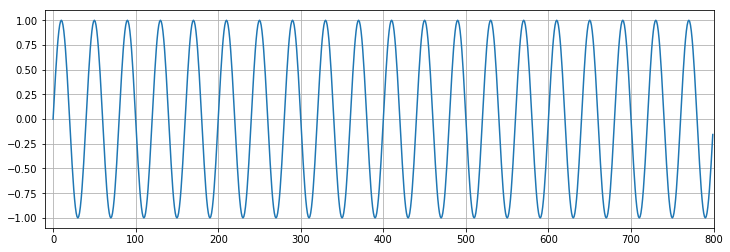

In [ ]:
# Create & plot data points
x = torch.linspace(0,799,steps=800)
y = torch.sin(x*2*3.1416/40)

plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(y.numpy());

## Create train and test sets
We want to take the first 760 samples in our series as a training sequence, and the last 40 for testing.
<div class="alert alert-info"><strong>NOTE:</strong> We tend to use the terms "series" and "sequence" interchangeably. Usually "series" refers to the entire population of data, or the full time series, and "sequence" refers to some portion of it.</div>

In [ ]:
test_size = 40

train_set = y[:-test_size]
test_set = y[-test_size:]

## Prepare the training data
When working with LSTM models, we start by dividing the training sequence into a series of overlapping "windows". Each window consists of a connected string of samples. The label used for comparison is equal to the next value in the sequence. In this way our network learns what value should follow a given pattern of preceding values. Note: although the LSTM layer produces a prediction for each sample in the window, we only care about the last one.

For example, say we have a series of 15 records, and a window size of 5. We feed $[x_1,..,x_5]$ into the model, and compare the prediction to $x_6$. Then we backprop, update parameters, and feed $[x_2,..,x_6]$ into the model. We compare the new output to $x_7$ and so forth up to $[x_{10},..,x_{14}]$.

To simplify matters, we'll define a function called <tt>input_data</tt> that builds a list of <tt>(seq, label)</tt> tuples. Windows overlap, so the first tuple might contain $([x_1,..,x_5],[x_6])$, the second would have $([x_2,..,x_6],[x_7])$, etc. 

Here $k$ is the width of the window. Due to the overlap, we'll have a total number of <tt>(seq, label)</tt> tuples equal to $\textrm{len}(series)-k$

In [ ]:
def input_data(seq,ws):  # ws is the window size
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

<div class="alert alert-info"><strong>NOTE:</strong> "Windows" are different from "batches". In our example we'll feed one window into the model at a time, so our batch size would be 1. If we passed two windows into the model before we backprop and update weights, our batch size would be 2.</div>

To train on our sine wave data we'll use a window size of 40 (one entire cycle). 

In [ ]:
# From above:
# test_size = 40
# train_set = y[:-test_size]
# test_set = y[-test_size:]

window_size = 40

# Create the training dataset of sequence/label tuples:
train_data = input_data(train_set,window_size)

len(train_data) # this should equal 760-40

720

In [ ]:
# Display the first (seq/label) tuple in train_data
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
          7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
         -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
         -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
 tensor([1.4480e-05]))

In [ ]:
torch.set_printoptions(sci_mode=False) # to improve the appearance of tensors
train_data[0]

(tensor([     0.0000,      0.1564,      0.3090,      0.4540,      0.5878,
              0.7071,      0.8090,      0.8910,      0.9511,      0.9877,
              1.0000,      0.9877,      0.9511,      0.8910,      0.8090,
              0.7071,      0.5878,      0.4540,      0.3090,      0.1564,
             -0.0000,     -0.1564,     -0.3090,     -0.4540,     -0.5878,
             -0.7071,     -0.8090,     -0.8910,     -0.9511,     -0.9877,
             -1.0000,     -0.9877,     -0.9511,     -0.8910,     -0.8090,
             -0.7071,     -0.5878,     -0.4540,     -0.3090,     -0.1564]),
 tensor([    0.0000]))

## Define an LSTM model
Our model will have one LSTM layer with an input size of 1 and a hidden size of 50, followed by a fully-connected layer to reduce the output to the prediction size of 1.<br>
<div class="alert alert-info"><strong>NOTE:</strong> You will often see the terms <em>input_dim</em> and <em> hidden_dim</em> used in place of <em>input_size</em> and <em>hidden_size</em>. They mean the same thing. We'll stick to <em>input_size</em> and <em>hidden_size</em> to stay consistent with PyTorch's built-in keywords.</div>

During training we pass three tensors through the LSTM layer - the sequence, the hidden state $h_0$ and the cell state $c_0$.<br>

This means we need to initialize $h_0$ and $c_0$. This can be done with random values, but we'll use zeros instead.

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, out_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        # Add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size)
        
        # Add a fully-connected layer:
        self.linear = nn.Linear(hidden_size,out_size)
        
        # Initialize h0 and c0:
        self.hidden = (torch.zeros(1,1,hidden_size),
                       torch.zeros(1,1,hidden_size))
    
    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq), 1, -1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]   # we only care about the last prediction

## Instantiate the model, define loss & optimization functions
Since we're comparing single values, we'll use <a href='https://pytorch.org/docs/stable/nn.html#mseloss'><tt><strong>torch.nn.MSELoss</strong></tt></a><br>Also, we've found that <a href='https://pytorch.org/docs/stable/optim.html#torch.optim.SGD'><tt><strong>torch.optim.SGD</strong></tt></a> converges faster for this application than <a href='https://pytorch.org/docs/stable/optim.html#torch.optim.Adam'><tt><strong>torch.optim.Adam</strong></tt></a>

In [ ]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [ ]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')
    
count_parameters(model)

   200
 10000
   200
   200
    50
     1
______
 10651


## Predicting future values
To show how an LSTM model improves after each epoch, we'll run predictions and plot the results. Our goal is to predict the last sequence of 40 values, and compare them to the known data in our test set. However, we have to be careful <em>not</em> to use test data in the predictions - that is, each new prediction derives from previously predicted values.

The trick is to take the last known window, predict the next value, then <em>append</em> the predicted value to the sequence and run a new prediction on a window that includes the value we've just predicted. It's like adding track in front of the train as it's moving.<br><em>Image source:</em> https://giphy.com/gifs/aardman-cartoon-train-3oz8xtBx06mcZWoNJm<br>
<img style="display: inline-block" src="../Images/WallaceGromitTrainTrack.gif" alt="Wallace & Gromit" width="400">

In this way, a well-trained model <em>should</em> follow any regular trends/cycles in the data.

## Train and simultaneously evaluate the model
We'll train 10 epochs. For clarity, we'll "zoom in" on the test set, and only display from point 700 to the end.

Epoch:  1 Loss: 0.09212875
Loss on test predictions: 0.6071590185165405


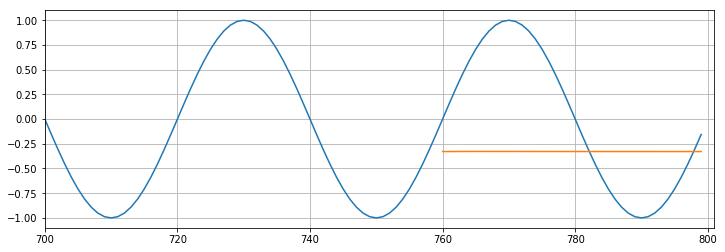

Epoch:  2 Loss: 0.06506767
Loss on test predictions: 0.565098762512207


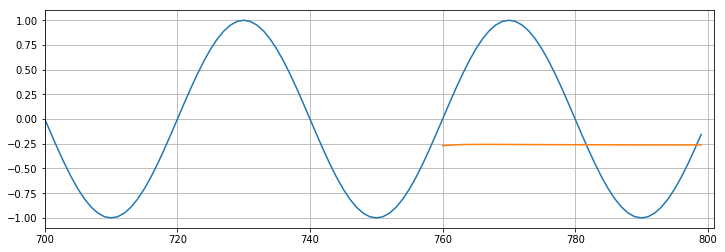

Epoch:  3 Loss: 0.04198047
Loss on test predictions: 0.5199716687202454


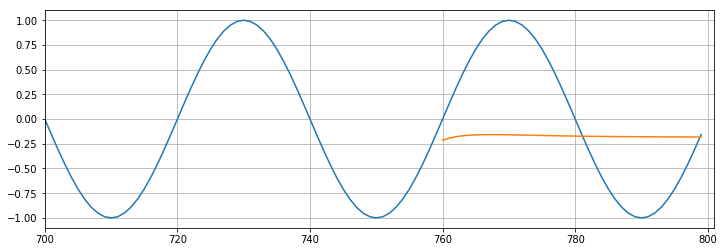

Epoch:  4 Loss: 0.01784276
Loss on test predictions: 0.42209967970848083


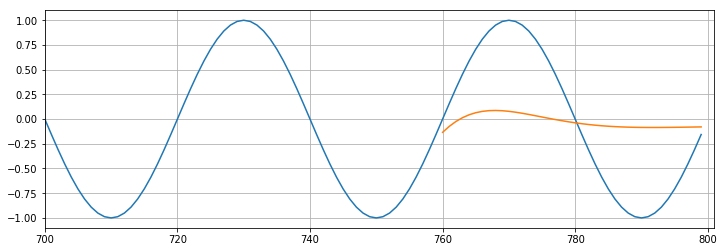

Epoch:  5 Loss: 0.00288710
Loss on test predictions: 0.16624116897583008


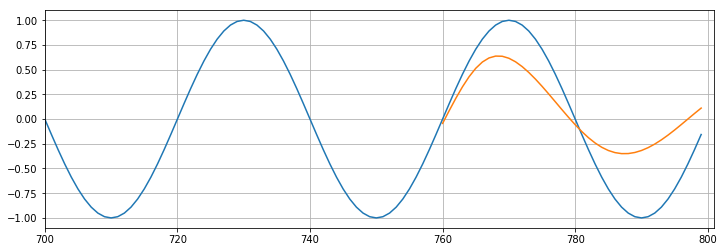

Epoch:  6 Loss: 0.00032008
Loss on test predictions: 0.03055439703166485


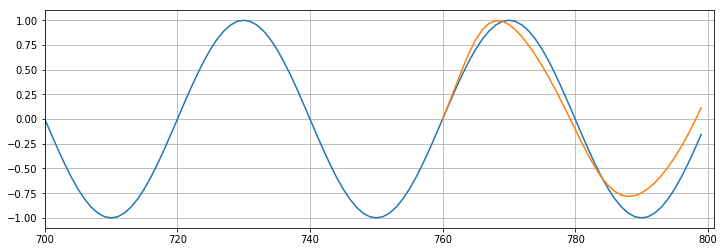

Epoch:  7 Loss: 0.00012969
Loss on test predictions: 0.014990181662142277


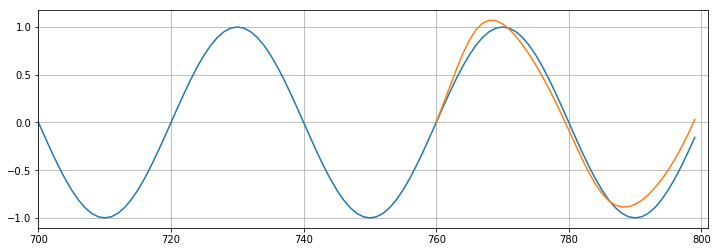

Epoch:  8 Loss: 0.00012007
Loss on test predictions: 0.011856676079332829


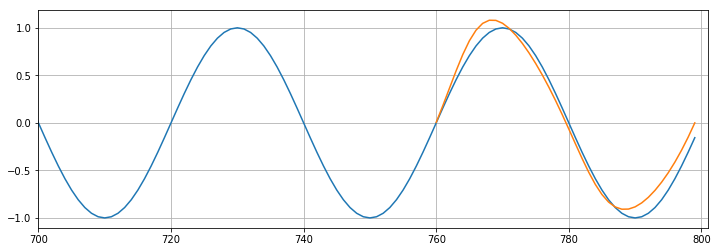

Epoch:  9 Loss: 0.00012656
Loss on test predictions: 0.010163827799260616


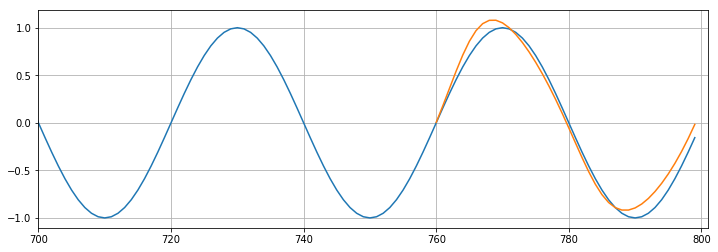

Epoch: 10 Loss: 0.00013195
Loss on test predictions: 0.00889757089316845


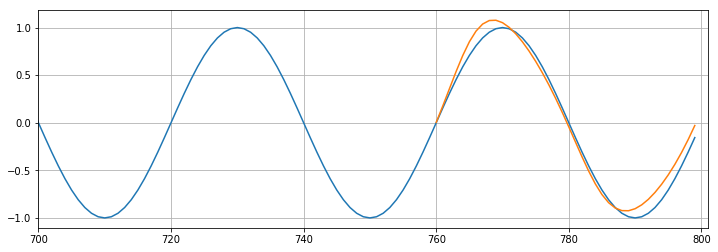

In [ ]:
epochs = 10
future = 40

for i in range(epochs):
    
    # tuple-unpack the train_data set
    for seq, y_train in train_data:
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')
    
    # MAKE PREDICTIONS
    # start with a list of the last 10 training records
    preds = train_set[-window_size:].tolist()

    for f in range(future):  
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                            torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
            
    loss = criterion(torch.tensor(preds[-window_size:]),y[760:])
    print(f'Loss on test predictions: {loss}')

    # Plot from point 700 to the end
    plt.figure(figsize=(12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760,800),preds[window_size:])
    plt.show()

## Forecasting into an unknown future
We'll continue to train our model, this time using the entire dataset. Then we'll predict what the <em>next</em> 40 points should be.

### Train the model
Expect this to take a few minutes.

In [ ]:
epochs = 10
window_size = 40
future = 40

# Create the full set of sequence/label tuples:
all_data = input_data(y,window_size)
len(all_data)  # this should equal 800-40

760

In [ ]:
import time
start_time = time.time()

for i in range(epochs):
    
    # tuple-unpack the entire set of data
    for seq, y_train in all_data:  
       
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')
    
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch:  1 Loss: 0.00013453
Epoch:  2 Loss: 0.00013443
Epoch:  3 Loss: 0.00013232
Epoch:  4 Loss: 0.00012879
Epoch:  5 Loss: 0.00012434
Epoch:  6 Loss: 0.00011931
Epoch:  7 Loss: 0.00011398
Epoch:  8 Loss: 0.00010854
Epoch:  9 Loss: 0.00010313
Epoch: 10 Loss: 0.00009784

Duration: 173 seconds


### Predict future values, plot the result

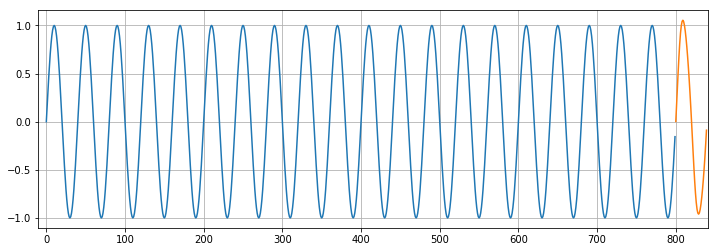

In [ ]:
preds = y[-window_size:].tolist()

for i in range(future):  
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        # Reset the hidden parameters
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))  
        preds.append(model(seq).item())

plt.figure(figsize=(12,4))
plt.xlim(-10,841)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(800,800+future),preds[window_size:])
plt.show()

# RNN on a Time Series
For these examples we're using data from the Federal Reserve Economic Database (FRED) concerning Sales of Beer, Wine, and Distilled Alcoholic Beverages in millions of dollars from January 1992 to January 2019 (325 records).

Data source: https://fred.stlouisfed.org/series/S4248SM144NCEN

## Perform standard imports

In [ ]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# This relates to plotting datetime values with matplotlib:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Load the dataset
We'll take advantage of pandas' built-in <a href='https://pandas.pydata.org/pandas-docs/stable/timeseries.html'>DatetimeIndex</a> by passing <tt>parse_dates=True</tt>

In [ ]:
df = pd.read_csv('../Data/TimeSeriesData/Alcohol_Sales.csv',index_col=0,parse_dates=True)
len(df)

325

In [ ]:
# Always a good idea with time series data:
df.dropna(inplace=True)
len(df)

325

In [ ]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [ ]:
df.tail()

,S4248SM144NCEN
DATE,
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174
2018-12-01,15504
2019-01-01,10718


## Plotting time series data
We can add titles, axis labels, and other features to the plot.<br>
We're going to tighten the x-axis to fit the width of the actual data with <tt>plt.autoscale(axis='x',tight=True)</tt>.<br>
Alternatively you could set your own limits with <tt>plt.xlim(pd.Timestamp('1992-01-01'), pd.Timestamp('2019-01-01'))</tt> or some other values.

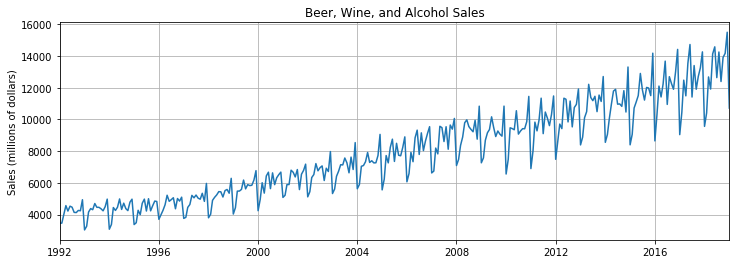

In [ ]:
plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.show()

## Prepare the data
In the next steps we'll divide the data into train/test sets, then normalize the training values so that they fall between -1 and 1 (to improve training). We'll train the model, then predict into a period that matches the test set. Finally, we'll forecast into an unknown future.

In [ ]:
# Extract values from the source .csv file
y = df['S4248SM144NCEN'].values.astype(float)

# Define a test size
test_size = 12

# Create train and test sets
train_set = y[:-test_size]
test_set = y[-test_size:]

In [ ]:
test_set

array([10415., 12683., 11919., 14138., 14583., 12640., 14257., 12396.,
       13914., 14174., 15504., 10718.])

It's worth noting that in our previous exercise the train and test sets were tensors. Here they're numpy arrays. This is because one of the steps we're about to perform outputs an array, and we'd have to turn it into a tensor anyway.

## Normalize the data
The formula for normalizing data around zero is:<br>
### $X_{norm} = \frac{X - \mu} {\sigma}$
where $\mu$ is the population mean, and $\sigma$ is the population standard deviation.<br>
Recall that back in the CNN section we transformed image files using <a href='https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Normalize'><tt><strong>torchvision.transforms.Normalize(<em>mean, std</em>)</strong></tt></a>, both because it was built into DataLoader, and because our pretrained models expected specific normalization values.<br>

Ultimately we want to perform <a href='https://en.wikipedia.org/wiki/Feature_scaling'>min/max feature scaling</a> so that our values fall between -1 and 1, as this makes hyperparameters converge faster.<br>The formula for this would be:<br>
### $X^{\prime} = a + \frac{(X - X_{min}) (b - a)} {X_{max} - X_{min}}$
where $a={-1}$ and $b=1$<br>

We can use scikit-learn to do this, with <a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html'><tt><strong>sklearn.preprocessing.MinMaxScaler()</strong></tt></a>

NOTE: We only want to normalize the training set to avoid data leakage. If we include the test set then the higher average values of the test set could become part of the signal in the training set. There's a good article on data leakage <a href='test_set = input_data(test_norm,window_size)'>here</a>.

After using transformed data to train the model and generate predictions, we'll inverse_transform the predicted values so that we can compare them to the actual test data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate a scaler with a feature range from -1 to 1
scaler = MinMaxScaler(feature_range=(-1, 1))

In [ ]:
# Normalize the training set
train_norm = scaler.fit_transform(train_set.reshape(-1, 1))

In [ ]:
train_norm.min()

-1.0

In [ ]:
train_norm.max()

1.0

In [ ]:
train_norm.mean()

-0.2041940178388313

In [ ]:
type(train_norm)

numpy.ndarray

## Prepare data for LSTM
Here we'll create our list of (seq/label) tuples from the training set. Recall that an LSTM consumes a window of samples toward the first prediction, so the size of our training set will become ((325 - test_size) - window_size).

In [ ]:
# Convert train_norm from an array to a tensor
train_norm = torch.FloatTensor(train_norm).view(-1)

# Define a window size
window_size = 12

# Define function to create seq/label tuples
def input_data(seq,ws):  # ws is the window size
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

# Apply the input_data function to train_norm
train_data = input_data(train_norm,window_size)
len(train_data)  # this should equal 325-12-12

301

In [ ]:
# Display the first seq/label tuple in the train data
train_data[0]

(tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
         -0.8128, -0.7901, -0.7933, -0.6743]), tensor([-1.]))

## Define the model
This time we'll use an LSTM layer of size (1,100).

In [ ]:
class LSTMnetwork(nn.Module):
    def __init__(self,input_size=1,hidden_size=100,output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        # Add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size)
        
        # Add a fully-connected layer:
        self.linear = nn.Linear(hidden_size,output_size)
        
        # Initialize h0 and c0:
        self.hidden = (torch.zeros(1,1,self.hidden_size),
                       torch.zeros(1,1,self.hidden_size))

    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]  # we only want the last value

## Instantiate the model, define loss and optimization functions

In [ ]:
torch.manual_seed(101)
model = LSTMnetwork()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model

LSTMnetwork(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')
    
count_parameters(model)

   400
 40000
   400
   400
   100
     1
______
 41301


## Train the model

In [ ]:
epochs = 100

import time
start_time = time.time()

for epoch in range(epochs):
    
    # extract the sequence & label from the training data
    for seq, y_train in train_data:
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')
    
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch:  1 Loss: 0.25314346
Epoch:  2 Loss: 0.37523878
Epoch:  3 Loss: 0.39012098
Epoch:  4 Loss: 0.34949699
Epoch:  5 Loss: 0.33077896
Epoch:  6 Loss: 0.33230731
Epoch:  7 Loss: 0.32667691
Epoch:  8 Loss: 0.32077038
Epoch:  9 Loss: 0.30651760
Epoch: 10 Loss: 0.29517019
Epoch: 11 Loss: 0.26913935
Epoch: 12 Loss: 0.25979361
Epoch: 13 Loss: 0.24600053
Epoch: 14 Loss: 0.22227803
Epoch: 15 Loss: 0.18593730
Epoch: 16 Loss: 0.18445705
Epoch: 17 Loss: 0.17432655
Epoch: 18 Loss: 0.25822312
Epoch: 19 Loss: 0.22420478
Epoch: 20 Loss: 0.23121868
Epoch: 21 Loss: 0.19758533
Epoch: 22 Loss: 0.18988022
Epoch: 23 Loss: 0.21032184
Epoch: 24 Loss: 0.16950732
Epoch: 25 Loss: 0.14586549
Epoch: 26 Loss: 0.11828811
Epoch: 27 Loss: 0.00027535
Epoch: 28 Loss: 0.00681852
Epoch: 29 Loss: 0.05630350
Epoch: 30 Loss: 0.01223376
Epoch: 31 Loss: 0.02709176
Epoch: 32 Loss: 0.03447094
Epoch: 33 Loss: 0.02249899
Epoch: 34 Loss: 0.01159327
Epoch: 35 Loss: 0.01592799
Epoch: 36 Loss: 0.00303702
Epoch: 37 Loss: 0.00015524
E

## Run predictions and compare to known test set

In [ ]:
future = 12

# Add the last window of training values to the list of predictions
preds = train_norm[-window_size:].tolist()

# Set the model to evaluation mode
model.eval()

for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        preds.append(model(seq).item())

In [ ]:
# Display predicted values
preds[window_size:]    # equivalent to preds[-future:]

[0.3245275914669037,
 0.5227924585342407,
 0.5454435348510742,
 0.8364425301551819,
 1.104264736175537,
 0.30810344219207764,
 0.8207511901855469,
 0.5576714873313904,
 0.5653725862503052,
 0.8198413848876953,
 0.9293676018714905,
 0.12615284323692322]

## Invert the normalization
We want to compare our test predictions to the original data, so we need to undo the previous normalization step. Note that <tt>inverse_transform</tt> uses the most recently applied parameters; we can rescale based on the test data, but not on the previous training data.

In [ ]:
true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
true_predictions

array([[10778.82414629],
       [11938.5744862 ],
       [12071.07195711],
       [13773.27058014],
       [15339.89657426],
       [10682.7510851 ],
       [13681.48408699],
       [12142.59936514],
       [12187.64694327],
       [13676.1621809 ],
       [14316.83578715],
       [ 9618.43105651]])

In [ ]:
df['S4248SM144NCEN'][-12:]

DATE
2018-02-01    10415
2018-03-01    12683
2018-04-01    11919
2018-05-01    14138
2018-06-01    14583
2018-07-01    12640
2018-08-01    14257
2018-09-01    12396
2018-10-01    13914
2018-11-01    14174
2018-12-01    15504
2019-01-01    10718
Name: S4248SM144NCEN, dtype: int64

It looks like our predictions weren't that far off!
## Plot the results
Our original data contains a datetime index, but our predicted values do not. We can create a range of dates using NumPy that are spaced one month apart using <tt>dtype='datetime64[M]'</tt>, and then store them with day values to match our dataset with <tt>.astype('datetime64[D]')</tt>.

In [ ]:
# Remember that the stop date has to be later than the last predicted value.
x = np.arange('2018-02-01', '2019-02-01', dtype='datetime64[M]').astype('datetime64[D]')
x

array(['2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
       '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
       '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
      dtype='datetime64[D]')

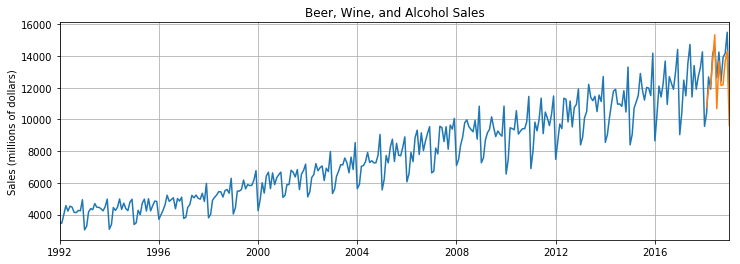

In [ ]:
plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions)
plt.show()

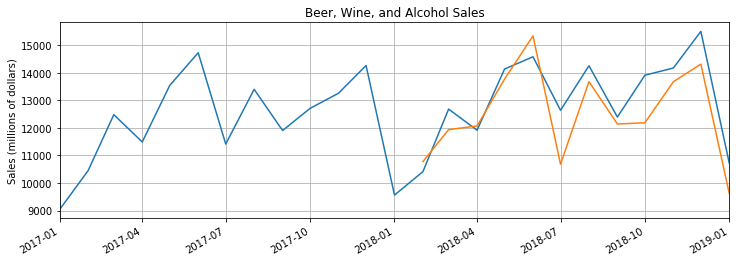

In [ ]:
# Plot the end of the graph
fig = plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()

# Select the end of the graph with slice notation:
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_predictions)
plt.show()

For more information on x-axis date formatting in matplotlib, check out <a href='https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.autofmt_xdate'><tt><strong>matplotlib.figure.Figure.autofmt_xdate</strong></tt></a> and <a href='https://matplotlib.org/api/dates_api.html#matplotlib.dates.DateFormatter'><tt><strong>matplotlib.dates.DateFormatter</strong></tt></a>

## Forecast into an unknown future
This time we'll continue training the model using the entire dataset, and predict 12 steps into the future.

In [ ]:
epochs = 100

# set model to back to training mode
model.train()

# feature scale the entire dataset
y_norm = scaler.fit_transform(y.reshape(-1, 1))
y_norm = torch.FloatTensor(y_norm).view(-1)
all_data = input_data(y_norm,window_size)

import time
start_time = time.time()

for epoch in range(epochs):
    
    # train on the full set of sequences
    for seq, y_train in all_data:  
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')
    
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch:  1 Loss: 0.02658496
Epoch:  2 Loss: 0.02985313
Epoch:  3 Loss: 0.01421225
Epoch:  4 Loss: 0.01419733
Epoch:  5 Loss: 0.01290122
Epoch:  6 Loss: 0.01244991
Epoch:  7 Loss: 0.01119690
Epoch:  8 Loss: 0.00854800
Epoch:  9 Loss: 0.00788417
Epoch: 10 Loss: 0.00792318
Epoch: 11 Loss: 0.00556064
Epoch: 12 Loss: 0.00598394
Epoch: 13 Loss: 0.00537636
Epoch: 14 Loss: 0.00649350
Epoch: 15 Loss: 0.00798889
Epoch: 16 Loss: 0.00699036
Epoch: 17 Loss: 0.00741554
Epoch: 18 Loss: 0.00671443
Epoch: 19 Loss: 0.00555703
Epoch: 20 Loss: 0.00517232
Epoch: 21 Loss: 0.00519288
Epoch: 22 Loss: 0.00412102
Epoch: 23 Loss: 0.00535119
Epoch: 24 Loss: 0.00888540
Epoch: 25 Loss: 0.00753472
Epoch: 26 Loss: 0.00589289
Epoch: 27 Loss: 0.00580891
Epoch: 28 Loss: 0.00776316
Epoch: 29 Loss: 0.00629479
Epoch: 30 Loss: 0.00895946
Epoch: 31 Loss: 0.00883982
Epoch: 32 Loss: 0.00968022
Epoch: 33 Loss: 0.00415197
Epoch: 34 Loss: 0.00383917
Epoch: 35 Loss: 0.00253066
Epoch: 36 Loss: 0.00149691
Epoch: 37 Loss: 0.00340568
E

### Predict future values, plot the result

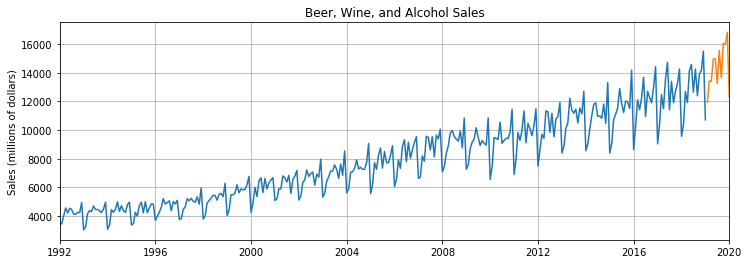

In [ ]:
window_size = 12
future = 12
L = len(y)

preds = y_norm[-window_size:].tolist()

model.eval()
for i in range(future):  
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        # Reset the hidden parameters here!
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))  
        preds.append(model(seq).item())

# Inverse-normalize the prediction set
true_predictions = scaler.inverse_transform(np.array(preds).reshape(-1, 1))

# PLOT THE RESULT
# Set a data range for the predicted data.
# Remember that the stop date has to be later than the last predicted value.
x = np.arange('2019-02-01', '2020-02-01', dtype='datetime64[M]').astype('datetime64[D]')

plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions[window_size:])
plt.show()

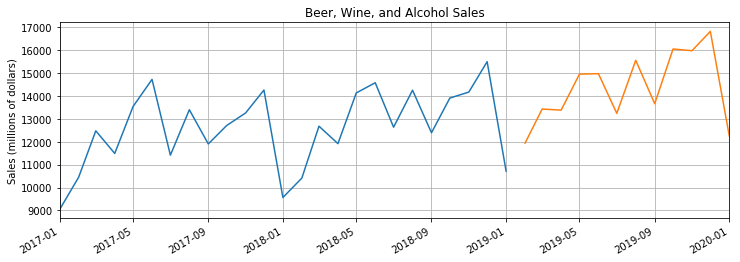

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_predictions[window_size:])
plt.show()

<h3>BONUS:</h3>To save time in the future, we've written a function that will take in a time series training data set, and output a tensor of <tt>(seq, label)</tt> tuples.

In [ ]:
# Load dependencies
from sklearn.preprocessing import MinMaxScaler

# Instantiate a scaler
"""
This has to be done outside the function definition so that
we can inverse_transform the prediction set later on.
"""
scaler = MinMaxScaler(feature_range=(-1, 1))

# Extract values from the source .csv file
df = pd.read_csv('../Data/TimeSeriesData/Alcohol_Sales.csv',index_col=0,parse_dates=True)
y = df['S4248SM144NCEN'].values.astype(float)

# Define a test size
test_size = 12

# Create the training set of values
train_set = y[:-test_size]

In [ ]:
# DEFINE A FUNCTION:
def create_train_data(seq,ws=12):
    """Takes in a training sequence and window size (ws) of
       default size 12, returns a tensor of (seq/label) tuples"""
    seq_norm = scaler.fit_transform(seq.reshape(-1, 1))    
    seq_norm = torch.FloatTensor(seq_norm).view(-1)

    out = []
    L = len(seq_norm)
    for i in range(L-ws):
        window = seq_norm[i:i+ws]
        label = seq_norm[i+ws:i+ws+1]
        out.append((window,label))
    return out

In [ ]:
# Apply the function to train_set
train_data = create_train_data(train_set,12)
len(train_data)  # this should equal 313-12

301

In [ ]:
train_data[0]

(tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
         -0.8128, -0.7901, -0.7933, -0.6743]), tensor([-1.]))

In [ ]:
help(create_train_data)

Help on function create_train_data in module __main__:

create_train_data(seq, ws=12)
    Takes in a training sequence and window size (ws) of
    default size 12, returns a tensor of (seq/label) tuples



# Using-GPU-and-CUDA

## What is CUDA?

Most people confuse CUDA for a language or maybe an API. It is not.

It’s more than that. CUDA is a parallel computing platform and programming model that makes using a GPU for general purpose computing simple and elegant. The developer still programs in the familiar C, C++, Fortran, or an ever expanding list of supported languages, and incorporates extensions of these languages in the form of a few basic keywords.

These keywords let the developer express massive amounts of parallelism and direct the compiler to the portion of the application that maps to the GPU.

## How do I install PyTorch for GPU?

Refer to video, its dependent on whether you have an NVIDIA GPU card or not.

## How do I know if I have CUDA available?

In [ ]:
import torch
torch.cuda.is_available()
# True

True

## Using GPU and CUDA

We've provided 2 versions of our yml file, a GPU version and a CPU version. To use GPU, you need to either manually create a virtual environment, please watch the video related to this lecture, as not every computer can run GPU, you need CUDA and an NVIDIA GPU.

In [ ]:
## Get Id of default device
torch.cuda.current_device()

0

In [ ]:
# 0
torch.cuda.get_device_name(0) # Get name device with ID '0'

'GeForce GTX 1080 Ti'

In [ ]:
# Returns the current GPU memory usage by 
# tensors in bytes for a given device
torch.cuda.memory_allocated()

0

In [ ]:
# Returns the current GPU memory managed by the
# caching allocator in bytes for a given device
torch.cuda.memory_cached()

0

## Using CUDA instead of CPU

In [ ]:
# CPU
a = torch.FloatTensor([1.,2.])

In [ ]:
a

tensor([1., 2.])

In [ ]:
a.device

device(type='cpu')

In [ ]:
# GPU
a = torch.FloatTensor([1., 2.]).cuda()

In [ ]:
a.device

device(type='cuda', index=0)

In [ ]:
torch.cuda.memory_allocated()

512

### Sending Models to GPU

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
torch.manual_seed(32)
model = Model()

In [ ]:
# From the discussions here: discuss.pytorch.org/t/how-to-check-if-model-is-on-cuda
next(model.parameters()).is_cuda

False

In [ ]:
gpumodel = model.cuda()

In [ ]:
next(gpumodel.parameters()).is_cuda

True

In [ ]:
df = pd.read_csv('../Data/iris.csv')
X = df.drop('target',axis=1).values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

### Convert Tensors to .cuda() tensors

In [ ]:
X_train = torch.FloatTensor(X_train).cuda()
X_test = torch.FloatTensor(X_test).cuda()
y_train = torch.LongTensor(y_train).cuda()
y_test = torch.LongTensor(y_test).cuda()

In [ ]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)
testloader = DataLoader(X_test, batch_size=60, shuffle=False)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
import time
epochs = 100
losses = []
start = time.time()
for i in range(epochs):
    i+=1
    y_pred = gpumodel.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
print(f'TOTAL TRAINING TIME: {time.time()-start}')

epoch:  1  loss: 1.15071142
epoch: 11  loss: 0.93773186
epoch: 21  loss: 0.77982736
epoch: 31  loss: 0.60996711
epoch: 41  loss: 0.40083539
epoch: 51  loss: 0.25436994
epoch: 61  loss: 0.15052448
epoch: 71  loss: 0.10086147
epoch: 81  loss: 0.08127660
epoch: 91  loss: 0.07230931
TOTAL TRAINING TIME: 0.4668765068054199


# RNN for Text Generation


<img src="../Pierian-Data-Logo.PNG">
<br>
<strong><center>Copyright 2019. Created by Jose Marcial Portilla.</center></strong>


### Generating Text (encoded variables)

We saw how to generate continuous values, now let's see how to generalize this to generate categorical sequences (such as words or letters).

## Imports

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Get Text Data

In [ ]:
with open('../Data/shakespeare.txt','r',encoding='utf8') as f:
    text = f.read()

In [ ]:
text[:1000]

"\n                     1\n  From fairest creatures we desire increase,\n  That thereby beauty's rose might never die,\n  But as the riper should by time decease,\n  His tender heir might bear his memory:\n  But thou contracted to thine own bright eyes,\n  Feed'st thy light's flame with self-substantial fuel,\n  Making a famine where abundance lies,\n  Thy self thy foe, to thy sweet self too cruel:\n  Thou that art now the world's fresh ornament,\n  And only herald to the gaudy spring,\n  Within thine own bud buriest thy content,\n  And tender churl mak'st waste in niggarding:\n    Pity the world, or else this glutton be,\n    To eat the world's due, by the grave and thee.\n\n\n                     2\n  When forty winters shall besiege thy brow,\n  And dig deep trenches in thy beauty's field,\n  Thy youth's proud livery so gazed on now,\n  Will be a tattered weed of small worth held:  \n  Then being asked, where all thy beauty lies,\n  Where all the treasure of thy lusty days;\n  To sa

In [ ]:
print(text[:1000])


                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But as the riper should by time decease,
  His tender heir might bear his memory:
  But thou contracted to thine own bright eyes,
  Feed'st thy light's flame with self-substantial fuel,
  Making a famine where abundance lies,
  Thy self thy foe, to thy sweet self too cruel:
  Thou that art now the world's fresh ornament,
  And only herald to the gaudy spring,
  Within thine own bud buriest thy content,
  And tender churl mak'st waste in niggarding:
    Pity the world, or else this glutton be,
    To eat the world's due, by the grave and thee.


                     2
  When forty winters shall besiege thy brow,
  And dig deep trenches in thy beauty's field,
  Thy youth's proud livery so gazed on now,
  Will be a tattered weed of small worth held:  
  Then being asked, where all thy beauty lies,
  Where all the treasure of thy lusty days;
  To say within thine own deep su

In [ ]:
len(text)

5445609

### Encode Entire Text

In [ ]:
all_characters = set(text)

In [ ]:
# all_characters

In [ ]:
decoder = dict(enumerate(all_characters))

In [ ]:
# decoder
# decoder.items()

In [ ]:
encoder = {char: ind for ind,char in decoder.items()}

In [ ]:
# encoder

In [ ]:
encoded_text = np.array([encoder[char] for char in text])

In [ ]:
encoded_text[:500]

array([51, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 26, 41, 51, 26, 26, 31, 29, 39, 17, 26, 73, 14, 60,
       29, 46, 78, 21, 26, 35, 29, 46, 14, 21,  6, 29, 46, 78, 26,  2, 46,
       26, 65, 46, 78, 60, 29, 46, 26, 60, 55, 35, 29, 46, 14, 78, 46, 63,
       51, 26, 26, 62,  7, 14, 21, 26, 21,  7, 46, 29, 46, 74, 38, 26, 74,
       46, 14,  6, 21, 38, 77, 78, 26, 29, 39, 78, 46, 26, 17, 60, 82,  7,
       21, 26, 55, 46, 27, 46, 29, 26, 65, 60, 46, 63, 51, 26, 26, 67,  6,
       21, 26, 14, 78, 26, 21,  7, 46, 26, 29, 60, 22, 46, 29, 26, 78,  7,
       39,  6, 43, 65, 26, 74, 38, 26, 21, 60, 17, 46, 26, 65, 46, 35, 46,
       14, 78, 46, 63, 51, 26, 26, 36, 60, 78, 26, 21, 46, 55, 65, 46, 29,
       26,  7, 46, 60, 29, 26, 17, 60, 82,  7, 21, 26, 74, 46, 14, 29, 26,
        7, 60, 78, 26, 17, 46, 17, 39, 29, 38, 10, 51, 26, 26, 67,  6, 21,
       26, 21,  7, 39,  6, 26, 35, 39, 55, 21, 29, 14, 35, 21, 46, 65, 26,
       21, 39, 26, 21,  7

### One Hot Encoding

As previously discussed, we need to one-hot encode our data inorder for it to work with the network structure. Make sure to review numpy if any of these operations confuse you!

In [ ]:
def one_hot_encoder(encoded_text, num_uni_chars):
    '''
    encoded_text : batch of encoded text
    
    num_uni_chars = number of unique characters (len(set(text)))
    '''
    
    # METHOD FROM:
    # https://stackoverflow.com/questions/29831489/convert-encoded_textay-of-indices-to-1-hot-encoded-numpy-encoded_textay
      
    # Create a placeholder for zeros.
    one_hot = np.zeros((encoded_text.size, num_uni_chars))
    
    # Convert data type for later use with pytorch (errors if we dont!)
    one_hot = one_hot.astype(np.float32)

    # Using fancy indexing fill in the 1s at the correct index locations
    one_hot[np.arange(one_hot.shape[0]), encoded_text.flatten()] = 1.0
    

    # Reshape it so it matches the batch sahe
    one_hot = one_hot.reshape((*encoded_text.shape, num_uni_chars))
    
    return one_hot

In [ ]:
one_hot_encoder(np.array([1,2,0]),3)

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

--------------
---------------
## Creating Training Batches

We need to create a function that will generate batches of characters along with the next character in the sequence as a label.

-----------------
------------

In [ ]:
example_text = np.arange(10)

In [ ]:
example_text

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# If we wanted 5 batches
example_text.reshape((5,-1))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [ ]:
def generate_batches(encoded_text, samp_per_batch=10, seq_len=50):
    
    '''
    Generate (using yield) batches for training.
    
    X: Encoded Text of length seq_len
    Y: Encoded Text shifted by one
    
    Example:
    
    X:
    
    [[1 2 3]]
    
    Y:
    
    [[ 2 3 4]]
    
    encoded_text : Complete Encoded Text to make batches from
    batch_size : Number of samples per batch
    seq_len : Length of character sequence
       
    '''
    
    # Total number of characters per batch
    # Example: If samp_per_batch is 2 and seq_len is 50, then 100
    # characters come out per batch.
    char_per_batch = samp_per_batch * seq_len
    
    
    # Number of batches available to make
    # Use int() to roun to nearest integer
    num_batches_avail = int(len(encoded_text)/char_per_batch)
    
    # Cut off end of encoded_text that
    # won't fit evenly into a batch
    encoded_text = encoded_text[:num_batches_avail * char_per_batch]
    
    
    # Reshape text into rows the size of a batch
    encoded_text = encoded_text.reshape((samp_per_batch, -1))
    

    # Go through each row in array.
    for n in range(0, encoded_text.shape[1], seq_len):
        
        # Grab feature characters
        x = encoded_text[:, n:n+seq_len]
        
        # y is the target shifted over by 1
        y = np.zeros_like(x)
       
        #
        try:
            y[:, :-1] = x[:, 1:]
            y[:, -1]  = encoded_text[:, n+seq_len]
            
        # FOR POTENTIAL INDEXING ERROR AT THE END    
        except:
            y[:, :-1] = x[:, 1:]
            y[:, -1] = encoded_text[:, 0]
            
        yield x, y

#### Example of generating a batch

In [ ]:
sample_text = encoded_text[:20]

In [ ]:
sample_text

array([51, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
       26, 26, 26])

In [ ]:
batch_generator = generate_batches(sample_text,samp_per_batch=2,seq_len=5)

In [ ]:
# Grab first batch
x, y = next(batch_generator)

In [ ]:
x

array([[51, 26, 26, 26, 26],
       [26, 26, 26, 26, 26]])

In [ ]:
y

array([[26, 26, 26, 26, 26],
       [26, 26, 26, 26, 26]])

--------

### GPU Check

Remember this will take a lot longer on CPU!

In [ ]:
torch.cuda.is_available()

True

## Creating the LSTM Model

**Note! We will have options for GPU users and CPU users. CPU will take MUCH LONGER to train and you may encounter RAM issues depending on your hardware. If that is the case, consider using cloud services like AWS, GCP, or Azure. Note, these may cost you money to use!**

In [ ]:
class CharModel(nn.Module):
    
    def __init__(self, all_chars, num_hidden=256, num_layers=4,drop_prob=0.5,use_gpu=False):
        
        
        # SET UP ATTRIBUTES
        super().__init__()
        self.drop_prob = drop_prob
        self.num_layers = num_layers
        self.num_hidden = num_hidden
        self.use_gpu = use_gpu
        
        #CHARACTER SET, ENCODER, and DECODER
        self.all_chars = all_chars
        self.decoder = dict(enumerate(all_chars))
        self.encoder = {char: ind for ind,char in decoder.items()}
        
        
        self.lstm = nn.LSTM(len(self.all_chars), num_hidden, num_layers, dropout=drop_prob, batch_first=True)
        
        self.dropout = nn.Dropout(drop_prob)
        
        self.fc_linear = nn.Linear(num_hidden, len(self.all_chars))
      
    
    def forward(self, x, hidden):
                  
        
        lstm_output, hidden = self.lstm(x, hidden)
        
        
        drop_output = self.dropout(lstm_output)
        
        drop_output = drop_output.contiguous().view(-1, self.num_hidden)
        
        
        final_out = self.fc_linear(drop_output)
        
        
        return final_out, hidden
    
    
    def hidden_state(self, batch_size):
        '''
        Used as separate method to account for both GPU and CPU users.
        '''
        
        if self.use_gpu:
            
            hidden = (torch.zeros(self.num_layers,batch_size,self.num_hidden).cuda(),
                     torch.zeros(self.num_layers,batch_size,self.num_hidden).cuda())
        else:
            hidden = (torch.zeros(self.num_layers,batch_size,self.num_hidden),
                     torch.zeros(self.num_layers,batch_size,self.num_hidden))
        
        return hidden
        

### Instance of the Model

In [ ]:
model = CharModel(
    all_chars=all_characters,
    num_hidden=512,
    num_layers=3,
    drop_prob=0.5,
    use_gpu=True,
)

In [ ]:
total_param  = []
for p in model.parameters():
    total_param.append(int(p.numel()))

Try to make the total_parameters be roughly the same magnitude as the number of characters in the text.

In [ ]:
sum(total_param)

5470292

In [ ]:
len(encoded_text)

5445609

#### Optimizer and Loss

In [ ]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()

### Training Data and Validation Data

In [ ]:
# percentage of data to be used for training
train_percent = 0.1

In [ ]:
len(encoded_text)

5445609

In [ ]:
int(len(encoded_text) * (train_percent))

544560

In [ ]:
train_ind = int(len(encoded_text) * (train_percent))

In [ ]:
train_data = encoded_text[:train_ind]
val_data = encoded_text[train_ind:]

## Training the Network

### Variables

Feel free to play around with these values!

In [ ]:
## VARIABLES

# Epochs to train for
epochs = 50
# batch size 
batch_size = 128

# Length of sequence
seq_len = 100

# for printing report purposes
# always start at 0
tracker = 0

# number of characters in text
num_char = max(encoded_text)+1

------

In [ ]:
# Set model to train
model.train()


# Check to see if using GPU
if model.use_gpu:
    model.cuda()

for i in range(epochs):
    
    hidden = model.hidden_state(batch_size)
    
    
    for x,y in generate_batches(train_data,batch_size,seq_len):
        
        tracker += 1
        
        # One Hot Encode incoming data
        x = one_hot_encoder(x,num_char)
        
        # Convert Numpy Arrays to Tensor
        
        inputs = torch.from_numpy(x)
        targets = torch.from_numpy(y)
        
        # Adjust for GPU if necessary
        
        if model.use_gpu:
            
            inputs = inputs.cuda()
            targets = targets.cuda()
            
        # Reset Hidden State
        # If we dont' reset we would backpropagate through all training history
        hidden = tuple([state.data for state in hidden])
        
        model.zero_grad()
        
        lstm_output, hidden = model.forward(inputs,hidden)
        loss = criterion(lstm_output,targets.view(batch_size*seq_len).long())
        
        loss.backward()
        
        # POSSIBLE EXPLODING GRADIENT PROBLEM!
        # LET"S CLIP JUST IN CASE
        nn.utils.clip_grad_norm_(model.parameters(),max_norm=5)
        
        optimizer.step()
        
        
        
        ###################################
        ### CHECK ON VALIDATION SET ######
        #################################
        
        if tracker % 25 == 0:
            
            val_hidden = model.hidden_state(batch_size)
            val_losses = []
            model.eval()
            
            for x,y in generate_batches(val_data,batch_size,seq_len):
                
                # One Hot Encode incoming data
                x = one_hot_encoder(x,num_char)
                

                # Convert Numpy Arrays to Tensor

                inputs = torch.from_numpy(x)
                targets = torch.from_numpy(y)

                # Adjust for GPU if necessary

                if model.use_gpu:

                    inputs = inputs.cuda()
                    targets = targets.cuda()
                    
                # Reset Hidden State
                # If we dont' reset we would backpropagate through 
                # all training history
                val_hidden = tuple([state.data for state in val_hidden])
                
                lstm_output, val_hidden = model.forward(inputs,val_hidden)
                val_loss = criterion(lstm_output,targets.view(batch_size*seq_len).long())
        
                val_losses.append(val_loss.item())
            
            # Reset to training model after val for loop
            model.train()
            
            print(f"Epoch: {i} Step: {tracker} Val Loss: {val_loss.item()}")

Epoch: 0 Step: 25 Val Loss: 3.241183280944824
Epoch: 1 Step: 50 Val Loss: 3.2209343910217285
Epoch: 1 Step: 75 Val Loss: 3.2246036529541016
Epoch: 2 Step: 100 Val Loss: 3.103549003601074
Epoch: 2 Step: 125 Val Loss: 3.0078160762786865
Epoch: 3 Step: 150 Val Loss: 2.8424694538116455
Epoch: 4 Step: 175 Val Loss: 2.7311224937438965
Epoch: 4 Step: 200 Val Loss: 2.6245357990264893
Epoch: 5 Step: 225 Val Loss: 2.530056953430176
Epoch: 5 Step: 250 Val Loss: 2.511744737625122
Epoch: 6 Step: 275 Val Loss: 2.424506187438965
Epoch: 7 Step: 300 Val Loss: 2.3757734298706055
Epoch: 7 Step: 325 Val Loss: 2.3281121253967285
Epoch: 8 Step: 350 Val Loss: 2.287860631942749
Epoch: 8 Step: 375 Val Loss: 2.258666515350342
Epoch: 9 Step: 400 Val Loss: 2.219432830810547
Epoch: 10 Step: 425 Val Loss: 2.1962826251983643
Epoch: 10 Step: 450 Val Loss: 2.1531155109405518
Epoch: 11 Step: 475 Val Loss: 2.12485408782959
Epoch: 11 Step: 500 Val Loss: 2.102055072784424
Epoch: 12 Step: 525 Val Loss: 2.0815775394439697
E

-------
------

### Saving the Model

https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
# Be careful to overwrite our original name file!
model_name = 'example.net'

In [ ]:
torch.save(model.state_dict(),model_name)

### Load Model

In [ ]:
# MUST MATCH THE EXACT SAME SETTINGS AS MODEL USED DURING TRAINING!

model = CharModel(
    all_chars=all_characters,
    num_hidden=512,
    num_layers=3,
    drop_prob=0.5,
    use_gpu=True,
)

In [ ]:
model.load_state_dict(torch.load(model_name))
model.eval()

CharModel(
  (lstm): LSTM(84, 512, num_layers=3, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5)
  (fc_linear): Linear(in_features=512, out_features=84, bias=True)
)

## Generating Predictions

--------

In [ ]:
def predict_next_char(model, char, hidden=None, k=1):
        
        # Encode raw letters with model
        encoded_text = model.encoder[char]
        
        # set as numpy array for one hot encoding
        # NOTE THE [[ ]] dimensions!!
        encoded_text = np.array([[encoded_text]])
        
        # One hot encoding
        encoded_text = one_hot_encoder(encoded_text, len(model.all_chars))
        
        # Convert to Tensor
        inputs = torch.from_numpy(encoded_text)
        
        # Check for CPU
        if(model.use_gpu):
            inputs = inputs.cuda()
        
        
        # Grab hidden states
        hidden = tuple([state.data for state in hidden])
        
        
        # Run model and get predicted output
        lstm_out, hidden = model(inputs, hidden)

        
        # Convert lstm_out to probabilities
        probs = F.softmax(lstm_out, dim=1).data
        
        
        
        if(model.use_gpu):
            # move back to CPU to use with numpy
            probs = probs.cpu()
        
        
        # k determines how many characters to consider
        # for our probability choice.
        # https://pytorch.org/docs/stable/torch.html#torch.topk
        
        # Return k largest probabilities in tensor
        probs, index_positions = probs.topk(k)
        
        
        index_positions = index_positions.numpy().squeeze()
        
        # Create array of probabilities
        probs = probs.numpy().flatten()
        
        # Convert to probabilities per index
        probs = probs/probs.sum()
        
        # randomly choose a character based on probabilities
        char = np.random.choice(index_positions, p=probs)
       
        # return the encoded value of the predicted char and the hidden state
        return model.decoder[char], hidden

In [ ]:
def generate_text(model, size, seed='The', k=1):
        
      
    
    # CHECK FOR GPU
    if(model.use_gpu):
        model.cuda()
    else:
        model.cpu()
    
    # Evaluation mode
    model.eval()
    
    # begin output from initial seed
    output_chars = [c for c in seed]
    
    # intiate hidden state
    hidden = model.hidden_state(1)
    
    # predict the next character for every character in seed
    for char in seed:
        char, hidden = predict_next_char(model, char, hidden, k=k)
    
    # add initial characters to output
    output_chars.append(char)
    
    # Now generate for size requested
    for i in range(size):
        
        # predict based off very last letter in output_chars
        char, hidden = predict_next_char(model, output_chars[-1], hidden, k=k)
        
        # add predicted character
        output_chars.append(char)
    
    # return string of predicted text
    return ''.join(output_chars)

In [ ]:
print(generate_text(model, 1000, seed='The ', k=3))

The will true and breathed to me.
    If thou wert better to the stare and send thee,
    Which hath any trives and sound and stretged,
    That have the better send of the constance,
    That then that thou shaltst but that have seem surpet
    And we had been the self-fight and had their strange,
    With his sward shall strave a servant state.
    Where this't she is that to the wind of held
    That have this serve that she he with the child
    Which they were beauty of their command strowes
    And truth and strength to the serves and song.
    If thou say'st he that hath seen this should still
    To she with his both shall see him.
    The world was a solder thou to heaven with me,
    And should this can stay that I heave make
    Which his charge in her shames, and to his state.
    That have tho stol'd of this starts to have,  
    And we and to the cheeks that to the stol'd
    To serve the courtier time of that sense is.
    In the summer that that shall not,
    That he w